# Exploratory Data Analysis - Lending Club

This worksheet aims to perform Explorator Data Analysis on Lending Club’s Loan data. Primary focus is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

## 1. Data Sourcing

In [292]:

#Include markdown text and comments and rename file , also submit metadata file along with ipynb and ppt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#Apply formatting to floats
pd.options.display.float_format = '{:20,.2f}'.format



In [293]:
#Read csv to dataframe 
loan_df = pd.read_csv('loan.csv')

### Understanding the data

__Objective:__ 
1. Find no of rows/columns in loan_df.
2. Identify no of unique values in each column.
3. Identify percentage of null values in each column.

In [294]:
#find no of rows and columns in loan_df
loan_df.shape

(39717, 111)

In [295]:
#find data type of each column and no of non null values in each columns
loan_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [296]:
#percentage of null values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)

id                                               0.00
member_id                                        0.00
loan_amnt                                        0.00
funded_amnt                                      0.00
funded_amnt_inv                                  0.00
term                                             0.00
int_rate                                         0.00
installment                                      0.00
grade                                            0.00
sub_grade                                        0.00
emp_title                                        6.19
emp_length                                       2.71
home_ownership                                   0.00
annual_inc                                       0.00
verification_status                              0.00
issue_d                                          0.00
loan_status                                      0.00
pymnt_plan                                       0.00
url                         

In [297]:
#Lets understand the distribution of numeric columns
loan_df.describe()

id            member_id            loan_amnt  \
count            39,717.00            39,717.00            39,717.00   
mean            683,131.91           850,463.56            11,219.44   
std             210,694.13           265,678.31             7,456.67   
min              54,734.00            70,699.00               500.00   
25%             516,221.00           666,780.00             5,500.00   
50%             665,665.00           850,812.00            10,000.00   
75%             837,755.00         1,047,339.00            15,000.00   
max           1,077,501.00         1,314,167.00            35,000.00   

               funded_amnt      funded_amnt_inv          installment  \
count            39,717.00            39,717.00            39,717.00   
mean             10,947.71            10,397.45               324.56   
std               7,187.24             7,128.45               208.87   
min                 500.00                 0.00                15.69   
25%               5,400.00             5,000.00               167.02   
50%               9,600.00             8,975.00               280.22   
75%              15,000.00            14,400.00               430.78   
max              35,000.00            35,000.00             1,305.19   

                annual_inc                  dti          delinq_2yrs  \
count            39,717.00            39,717.00            39,717.00   
mean             68,968.93                13.32                 0.15   
std              63,793.77                 6.68                 0.49   
min               4,000.00                 0.00                 0.00   
25%              40,404.00                 8.17                 0.00   
50%              59,000.00                13.40                 0.00   
75%              82,300.00                18.60                 0.00   
max           6,000,000.00                29.99                11.00   

            inq_last_6mths  ...   num_tl_90g_dpd_24m   num_tl_op_past_12m  \
count            39,717.00  ...                 0.00                 0.00   
mean                  0.87  ...                  nan                  nan   
std                   1.07  ...                  nan                  nan   
min                   0.00  ...                  nan                  nan   
25%                   0.00  ...                  nan                  nan   
50%                   1.00  ...                  nan                  nan   
75%                   1.00  ...                  nan                  nan   
max                   8.00  ...                  nan                  nan   

            pct_tl_nvr_dlq     percent_bc_gt_75  pub_rec_bankruptcies  \
count                 0.00                 0.00             39,020.00   
mean                   nan                  nan                  0.04   
std                    nan                  nan                  0.20   
min                    nan                  nan                  0.00   
25%                    nan                  nan                  0.00   
50%                    nan                  nan                  0.00   
75%                    nan                  nan                  0.00   
max                    nan                  nan                  2.00   

                 tax_liens      tot_hi_cred_lim    total_bal_ex_mort  \
count            39,678.00                 0.00                 0.00   
mean                  0.00                  nan                  nan   
std                   0.00                  nan                  nan   
min                   0.00                  nan                  nan   
25%                   0.00                  nan                  nan   
50%                   0.00                  nan                  nan   
75%                   0.00                  nan                  nan   
max                   0.00                  nan                  nan   

            total_bc_limit  total_il_high_credit_limit  
count              

In [298]:
#no. of unique values in each column
loan_df.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868



__Summary:__
1. There are total 111 columns and 39717 rows in loan_df.
2. There are some columns having all null values.
3. Also, there are some columns having only one unique value.
4. id, member_id and url are unique in all the records.
5. By looking at distribution of loan_amnt, funded_amnt and funded_amnt_inv, it looks like these columns are identical and we need to find out correlation between these columns.
6. Also, there are some outliers in loan_amnt, funded_amnt, funded_amnt_inv, installment, annual_inc. We need to analyse these columns further.
7. There are columns having NAN & only unique value.

## 2. Data Cleaning and Manipulation

In [299]:
#Drop the columns where all entries are na
filtered_data = loan_df.dropna(axis=1, how='all')
len(filtered_data.columns)

57

In [300]:
#Drop the columns with only 1 distinct value
filtered_data = filtered_data.loc[:,filtered_data.apply(pd.Series.nunique) != 1]
len(filtered_data.columns)

48

In [301]:
#drop all the columns with greater than 60% of NA values
filtered_data = filtered_data.dropna(thresh=int(filtered_data.shape[0]*.60),how='all', axis=1)
len(filtered_data.columns)

45

In [302]:
#Remove unnecessary columns
#We do not require following
'''
id: just an identifier for loan listing that is unique across records 
member_id:  just an identifier for borrower that is unique across records
url: url for loan account page (do not draw insights)
desc: loan description provided by borrower (do not give insights as unique across records)
title: loan title provided by borrower(does not attract insights as it can be anything and not concrete)
emp_title: job title of borrower(it is non definite)
last_pymnt_d: last month payment was recieved (ie. random and cannot have direct relation with loan status)
last_pymnt_amnt:  total payment amount recieved (doesn't conclude anything)
'''

filtered_data = filtered_data.drop(['id','member_id','url','desc','title','emp_title','last_pymnt_d','last_pymnt_amnt'], axis=1)
len(filtered_data.columns)

37

In [303]:
filtered_data.describe(include = 'all')

loan_amnt          funded_amnt      funded_amnt_inv  \
count             39,717.00            39,717.00            39,717.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean              11,219.44            10,947.71            10,397.45   
std                7,456.67             7,187.24             7,128.45   
min                  500.00               500.00                 0.00   
25%                5,500.00             5,400.00             5,000.00   
50%               10,000.00             9,600.00             8,975.00   
75%               15,000.00            15,000.00            14,400.00   
max               35,000.00            35,000.00            35,000.00   

              term int_rate          installment  grade sub_grade emp_length  \
count        39717    39717            39,717.00  39717     39717      38642   
unique           2      371                  nan      7        35         11   
top      36 months   10.99%                  nan      B        B3  10+ years   
freq         29096      956                  nan  12020      2917       8879   
mean           NaN      NaN               324.56    NaN       NaN        NaN   
std            NaN      NaN               208.87    NaN       NaN        NaN   
min            NaN      NaN                15.69    NaN       NaN        NaN   
25%            NaN      NaN               167.02    NaN       NaN        NaN   
50%            NaN      NaN               280.22    NaN       NaN        NaN   
75%            NaN      NaN               430.78    NaN       NaN        NaN   
max            NaN      NaN             1,305.19    NaN       NaN        NaN   

       home_ownership  ...        out_prncp_inv          total_pymnt  \
count           39717  ...            39,717.00            39,717.00   
unique              5  ...                  nan                  nan   
top              RENT  ...                  nan                  nan   
freq            18899  ...                  nan                  nan   
mean              NaN  ...                50.99            12,153.60   
std               NaN  ...               373.82             9,042.04   
min               NaN  ...                 0.00                 0.00   
25%               NaN  ...                 0.00             5,576.93   
50%               NaN  ...                 0.00             9,899.64   
75%               NaN  ...                 0.00            16,534.43   
max               NaN  ...             6,307.37            58,563.68   

            total_pymnt_inv      total_rec_prncp        total_rec_int  \
count             39,717.00            39,717.00            39,717.00   
unique                  nan                  nan                  nan   
top                     nan                  nan                  nan   
freq                    nan                  nan                  nan   
mean              11,567.15             9,793.35             2,263.66   
std                8,942.67             7,065.52             2,608.11   
min                    0.00                 0.00                 0.00   
25%                5,112.31             4,600.00               662.18   
50%                9,287.15             8,000.00             1,348.91   
75%               15,798.81            13,653.26             2,833.40   
max               58,563.68            35,000.02            23,563.68   

         total_rec_late_fee           recoveries  collection_recovery_fee  \
count             39,717.00            39,717.00                39,717.00   
unique                  nan                  nan                      nan   
top                     nan                  nan                      nan   
freq                    nan                  nan                      nan   
mean                   1.36                95.22     

In [304]:
#Rows with all values null
filtered_data.isnull().all(axis=1).sum()

0

In [305]:
#Percentage of null values in each column
round(100*(filtered_data.isnull().sum()/len(filtered_data.index)),2)

loan_amnt                                 0.00
funded_amnt                               0.00
funded_amnt_inv                           0.00
term                                      0.00
int_rate                                  0.00
installment                               0.00
grade                                     0.00
sub_grade                                 0.00
emp_length                                2.71
home_ownership                            0.00
annual_inc                                0.00
verification_status                       0.00
issue_d                                   0.00
loan_status                               0.00
purpose                                   0.00
zip_code                                  0.00
addr_state                                0.00
dti                                       0.00
delinq_2yrs                               0.00
earliest_cr_line                          0.00
inq_last_6mths                            0.00
open_acc     

In [306]:
print(filtered_data.shape)

(39717, 37)


__Fix data types, standardize units and precision__

In [307]:
#Round funded_amnt_inv,total_pymnt,collection_recovery_fee to 2 decimal places
filtered_data = filtered_data.round({'funded_amnt_inv': 2, 'total_pymnt': 2, 'collection_recovery_fee': 2})

In [308]:
#Remove months from term and convert to numeric
filtered_data['term'] = filtered_data['term'].map(lambda x: x.rstrip(' months'))

In [309]:
#Remove % from int_rate and convert to numeric
filtered_data['int_rate'] = filtered_data['int_rate'].map(lambda x: x.rstrip('%'))
filtered_data['int_rate'] = pd.to_numeric(filtered_data['int_rate'])

In [310]:

#Remove 'years' and replace NAs with string 'Other' assuming these are self-employed
filtered_data['emp_length'] = filtered_data['emp_length'].map(lambda x: 'Other' if (x is np.nan) else x)

In [311]:
#Remove % from revol_util and convert to numeric
filtered_data['revol_util'] = filtered_data['revol_util'].map(lambda x: x if (x is np.nan) else str(x).rstrip('%'))
filtered_data['revol_util'] = pd.to_numeric(filtered_data['revol_util'])

__As we know loan amount and annual income go hand-in-hand. LC will not lend large amount if borrower can not afford to repay it and likewise if annual income is very high then borrower will not ask loan of too less amount. So, lets find outliers in annual income and loan amount and remove them from dataset__

Lets first visualize distribution of loan amount vs annual income

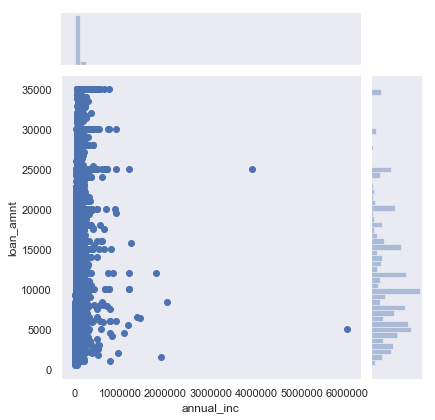

In [312]:
sns.jointplot('annual_inc', 'loan_amnt', filtered_data)
plt.show()

As we see in above scatter plot, annual income column contains outliers. Lets remove them.

In [313]:
from scipy import stats

z = np.abs(stats.zscore(filtered_data.loc[:, ['annual_inc']]))

#Lets take 3 as threshold for z score
filtered_data = filtered_data[(z<3).all(axis=1)]

Again, visualize distribution of loan amount vs annual income after romoving outliers

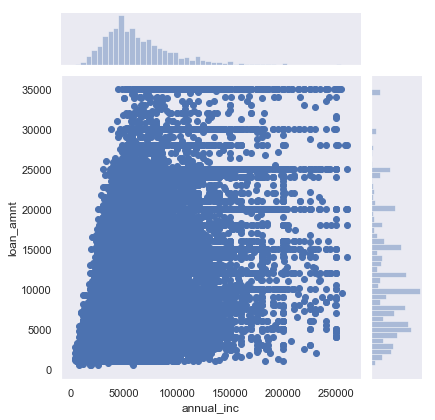

In [314]:
sns.jointplot('annual_inc', 'loan_amnt', filtered_data)
plt.show()

In [315]:
print(filtered_data.columns)
print(filtered_data.shape)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')
(39428, 37)


In [316]:
filtered_data.head()

loan_amnt  funded_amnt      funded_amnt_inv term             int_rate  \
0       5000         5000             4,975.00   36                10.65   
1       2500         2500             2,500.00   60                15.27   
2       2400         2400             2,400.00   36                15.96   
3      10000        10000            10,000.00   36                13.49   
4       3000         3000             3,000.00   60                12.69   

           installment grade sub_grade emp_length home_ownership  ...  \
0               162.87     B        B2  10+ years           RENT  ...   
1                59.83     C        C4   < 1 year           RENT  ...   
2                84.33     C        C5  10+ years           RENT  ...   
3               339.31     C        C1  10+ years           RENT  ...   
4                67.79     B        B5     1 year           RENT  ...   

         out_prncp_inv          total_pymnt      total_pymnt_inv  \
0                 0.00             5,863.16             5,833.84   
1                 0.00             1,008.71             1,008.71   
2                 0.00             3,005.67             3,005.67   
3                 0.00            12,231.89            12,231.89   
4               524.06             3,513.33             3,513.33   

       total_rec_prncp        total_rec_int   total_rec_late_fee  \
0             5,000.00               863.16                 0.00   
1               456.46               435.17                 0.00   
2             2,400.00               605.67                 0.00   
3            10,000.00             2,214.92                16.97   
4             2,475.94             1,037.39                 0.00   

            recoveries  collection_recovery_fee  last_credit_pull_d  \
0                 0.00                     0.00              May-16   
1               117.08                     1.11              Sep-13   
2                 0.00                     0.00              May-16   
3                 0.00                     0.00              Apr-16   
4                 0.00                     0.00              May-16   

  pub_rec_bankruptcies  
0                 0.00  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  

[5 rows x 37 columns]

## 3. Derived Metrics
Here we derive some new columns based on our business understanding that will help with our analysis.

In [317]:
#code to derive Issue year, month, quarter
#code to do binning of variables like income, interest rates, loan amount
#code to derive any new ratios like liability ratio, ROI etc

In [318]:
#Changing date formats for issue_d,earliest_cr_line
#Creating year , month ,quarter column
#For issue date and earliest cr dt
def createDerivedDates(colName):
    filtered_data[colName] =pd.to_datetime(filtered_data[colName] , format ='%b-%y').apply(lambda dt: dt - pd.DateOffset(years=100) if dt.year > datetime.datetime.now().year else dt)
    filtered_data[colName+'_month'] =filtered_data[colName].apply(lambda dt: dt.month)
    filtered_data[colName+'_year'] =filtered_data[colName].apply(lambda dt: dt.year)
    filtered_data[colName+'_quarter'] =filtered_data[colName].apply(lambda dt: dt.quarter)

In [319]:
#COMMON FUNCTIONS
from matplotlib import gridspec
#plot percentage of charged off loans in each category
def default_crosstab(df,col,orderByDefaulterRatio=False):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['defaulter_ratio'] = round((crosstab['Charged Off']/crosstab['All']),3)
    if(orderByDefaulterRatio == True):
        crosstab = crosstab[0:-1].sort_values('defaulter_ratio', ascending=False)
    else:
        crosstab = crosstab[0:-1]
    return crosstab

# Probability of charge off
#def plot_default_percentage(df,col,stacked= True):  
def plot_defaulter_percentage(df,x,plt_width=12,plt_height=6,orderByDefaulterRatio=False):
    sns.set_style("dark")
    fig = plt.figure(num=None, figsize=(plt_width, plt_height), dpi=80, facecolor='w', edgecolor='k')
    plotCrosstab = default_crosstab(df,x,orderByDefaulterRatio)
    linePlot = plotCrosstab[['defaulter_ratio']]      
    barPlot =  plotCrosstab.iloc[:,0:3]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'r',linewidth=2)
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True,alpha=0.7)
    ax.set_title(df[x].name.title()+' vs Probability of Default',fontsize=20,weight="bold")
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='y', which='major', labelsize=14)
    ax.set_xlabel(df[x].name.title(),fontsize=16)
    ax.set_ylabel('Default Ratio',color = 'r',fontsize=16)
    ax2.set_ylabel('Loan Count',color = 'b',fontsize=16)
    for i,type in enumerate(plotCrosstab.index):
        x1 = i
        y1 = round((plotCrosstab.loc[[type],['defaulter_ratio']].iat[0,0]),2)
        ax.text(x1, y1, y1, size=14)
    plt.show()

#Function to create bins for continuous variables
def get_category(x, start, end, step):
    for i in range(start,end,step):
        if x>i and x<=i+step:
            return str(i+1).zfill(2) +'-'+str(i+step).zfill(2)

In [320]:
#Common function for calculating ratio and plotting graph
def ratio_crosstab(x,title1,title2,y='loan_status'):
    defaulter_percentage=pd.crosstab(filtered_data[x], filtered_data['loan_status'], dropna=False)
    defaulter_percentage['defaulter_ratio']=defaulter_percentage['Charged Off']*100/(defaulter_percentage['Charged Off']+defaulter_percentage['Current']+defaulter_percentage['Fully Paid'])
    print(defaulter_percentage.sort_values('defaulter_ratio', ascending=False))
    stacked = defaulter_percentage.stack().reset_index().rename(columns={0:'value'})

    # plot grouped bar chart
    plt.figure(figsize=(15,5))
    plt.yscale('log')
    plt.subplot(1, 2, 1)
    plt.title(title1)
    sns.barplot(x=stacked[x], y=stacked.value)
    plt.subplot(1, 2, 2)
    plt.title(title2)
    sns.barplot(x=stacked[x], y=stacked.value, hue=stacked[y])

In [321]:
#Draw Heatmap
def draw_heatmap(exclude=None): 
    plt.subplots(figsize=(20,10))
    if exclude is not None:
        columns=[col for col in filtered_data.columns if col not in exclude]
    else:
        columns=filtered_data
        
    data=filtered_data[columns]    
    corr=data.corr()
    sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

In [322]:
def univariate_categorical_plot(df,col,hue=None, style=1):
    sns.set(style="darkgrid")
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
   
    if style == 0:
        fig.set_size_inches(5 , 5)
        ax = df[col].value_counts().plot(kind='pie', label=col,autopct='%1.0f%%')
    else:
        width = len(df[col].unique()) + 6 #+ 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        if len(temp.unique()) > 0:
            for p in ax.patches:
                height = np.nan_to_num(p.get_height(), 0)
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05,height+20))  
        else:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.32, p.get_height()+20)) 
    del temp
    plt.show()

In [323]:
def plot_boxplot_vs_loan_amount(column, order=None, figsize=(15,5), nRow=1, nCol=2):
    """
    Description:
        This function works on filtered dataframe (fileter_data) and plots two boxplots -
        1. vs loan amount and 2. vs loan amount hue loan status.
        
    Parameters:
        column: string, 
                Name of column which need to compare with loan amount and it should be present in fileter_data.
        order: list, optinal, default: None
               List containing the order of x axis elements. 
        figsize: (float, float), optional, default: (15,5)
                 Figure size (width, height in inches).
        nRow: int, optinal, default: 1
              No. of rows in the figure.
        nCol: int, optinal, default: 2
              No. of columns in the figure.
                    
    Returns: None
    """
    plt.figure(figsize=figsize)
    plt.subplot(nRow, nCol, 1) #plot vs loan amount
    plt.xlabel(column)
    plt.ylabel('Loan Amount')
    plt.title("Distribution of loan amount vs "+ column)
    sns.boxplot(x=column, y="loan_amnt",data=filtered_data, order=order)
    
    plt.subplot(nRow, nCol, 2) #plot vs loan amount hue loan status
    plt.xlabel(column)
    plt.ylabel('Loan Amount')
    plt.title("Distribution of loan amount by loan status vs "+ column)
    sns.boxplot(x=column, y="loan_amnt",  hue="loan_status",data=filtered_data, order=order)
    plt.show()

In [324]:
def get_steps(start, end, step):
    """
    Description:
        Useful to get continuous values in categorised form in sorted order which can be used to order x-axis of plots.
        
    Parameters:
        start: int
               Starting number for a catgory.
        end: int
             Ending number for a catgory.
        step: int
              Increment/step for a catgory.
               
    Returns: list,
             List containing the ordered categories ranging from passed start number to 
             passed end number incremented by pass step number.   
    """
    steps = []
    for i in range(start, end, step):
        steps.append(str(i+1).zfill(2) +'-'+str(i+step).zfill(2))
    return steps

#### TYPE DRIVEN METRICS

Creating derived columns(year/month/quarter) for date fields

In [325]:
createDerivedDates('issue_d')

Modifying field  to datetime

In [326]:
filtered_data['earliest_cr_line'] =pd.to_datetime(filtered_data['earliest_cr_line'] , format ='%b-%y').apply(lambda dt: dt - pd.DateOffset(years=100) if dt.year > datetime.datetime.now().year else dt)
filtered_data['last_credit_pull_d'] =pd.to_datetime(filtered_data['last_credit_pull_d'] , format ='%b-%y').apply(lambda dt: dt - pd.DateOffset(years=100) if dt.year > datetime.datetime.now().year else dt)



Creating rate bins as per rate of interest charged

In [327]:
filtered_data['int_rate_ranges'] = filtered_data['int_rate'].apply(lambda x: get_category(x,5,25,5))

Categorize annual income into Low (inc < 45000), Medium (45000 <= inc < 90000) and High (inc >= 90000) for further analysis

In [328]:
filtered_data['income_category'] = filtered_data['annual_inc'].apply(lambda x:
            'Low' if x < 45000 else 'Medium' if x < 90000 else 'High'
    )

Categorize dti as 1-5, 6-10, 11-15 and so on

In [329]:
filtered_data['dti_category'] = filtered_data['dti'].apply(lambda x: get_category(x,0,30,5))

Categorize total_acc and open_acc as 1-10, 11-20, 21-30 and so on

In [330]:
filtered_data['total_acc_category'] = filtered_data['total_acc'].apply(lambda x: get_category(x,0,60,10))
filtered_data['open_acc_category'] = filtered_data['open_acc'].apply(lambda x: get_category(x,0,40,10))

Set Loan tatus Code- 1: Charged-off, 0: Fully Paid or Current

In [331]:
#Add a new column with loan_status_cd which is 1 is Charged off and 0, otherwise. This will help in calculating %age of Charged off in each category by taking sum of the loan_status_cd
filtered_data['loan_status_cd'] = filtered_data['loan_status'].apply(lambda s: 1 if s=="Charged Off" else 0)

Binning the loan amount into different ranges

In [332]:
#Binning the loan amount
print(filtered_data.loan_amnt.describe())
filtered_data['loan_amount_range'] = filtered_data['loan_amnt'].apply(lambda x: get_category(x,0,35000,5000))


count              39,428.00
mean               11,158.58
std                 7,399.70
min                   500.00
25%                 5,500.00
50%                10,000.00
75%                15,000.00
max                35,000.00
Name: loan_amnt, dtype: float64


#### BUSINESS DRIVEN METRICS



Creating credit age to calculate impact on defaulters

In [333]:
filtered_data=filtered_data[pd.notnull(filtered_data['last_credit_pull_d'])]
filtered_data=filtered_data[pd.notnull(filtered_data['earliest_cr_line'])]

filtered_data['earliest_cr_line_year']=filtered_data['earliest_cr_line'].apply(lambda dt: dt.year)
filtered_data['last_credit_pull_d_year']=filtered_data['last_credit_pull_d'].apply(lambda dt: dt.year)



filtered_data['credit_age']= filtered_data['last_credit_pull_d_year'] - filtered_data['earliest_cr_line_year']

filtered_data[['earliest_cr_line','earliest_cr_line_year','last_credit_pull_d','last_credit_pull_d_year','credit_age']].head()


earliest_cr_line  earliest_cr_line_year last_credit_pull_d  \
0       1985-01-01                   1985         2016-05-01   
1       1999-04-01                   1999         2013-09-01   
2       2001-11-01                   2001         2016-05-01   
3       1996-02-01                   1996         2016-04-01   
4       1996-01-01                   1996         2016-05-01   

   last_credit_pull_d_year  credit_age  
0                     2016          31  
1                     2013          14  
2                     2016          15  
3                     2016          20  
4                     2016          20

Creating returns derived column - this will help us analyse the profit & loss made by LC across categories

In [334]:
filtered_data['returns']=filtered_data['total_pymnt'] - filtered_data['funded_amnt'] 

Creating liability ratio derived column ie installment/annual income

In [335]:
filtered_data['liability_ratio']=round(filtered_data['installment']/(filtered_data['annual_inc']/12),2)

In [336]:
print(filtered_data.shape)

(39426, 52)


## 4. Univariate Analysis
### 4.1 Categorial variables


The main aim of the univariate analysis done here is to understand the categorical and continuous variables available for analysis and distribution of data among them

#### 4.1.1 Loan Status

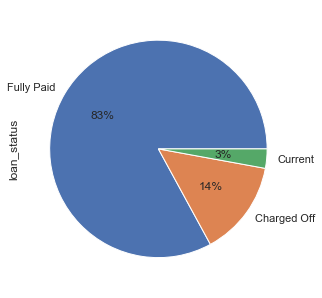

(39426, 52)

In [337]:
ax = univariate_categorical_plot(filtered_data, 'loan_status', style=0)
filtered_data.shape

14% loans have been charged off in the given data set

#### 4.1.2 Purpose of loan


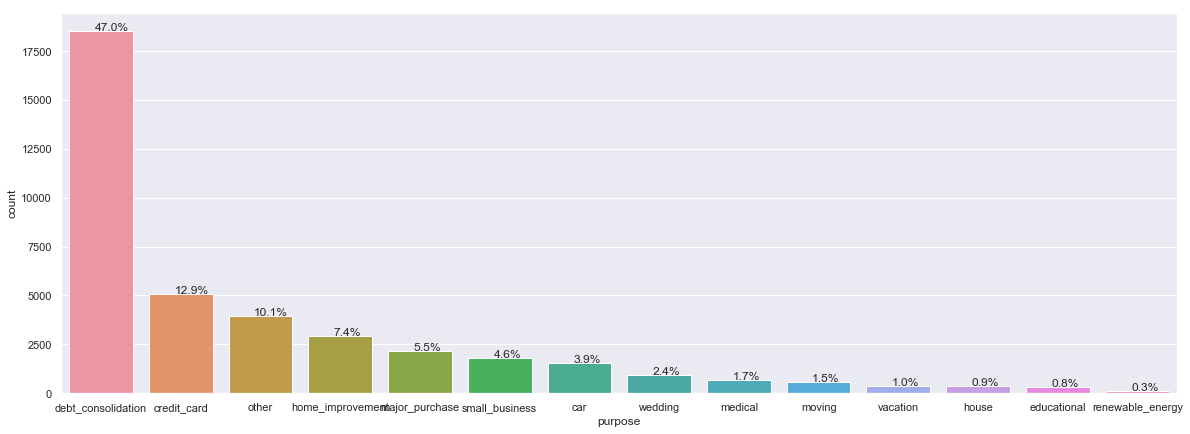

In [338]:
ax = univariate_categorical_plot(df=filtered_data, col='purpose')


Majority of the loans seem to be of purpose Debt Consolidation, Credit Card, Home Improvements and Others. Bivariate Analysis below to show which purpose contributes to maximum amount of loss due to default.

#### 4.1.3 Loan Term

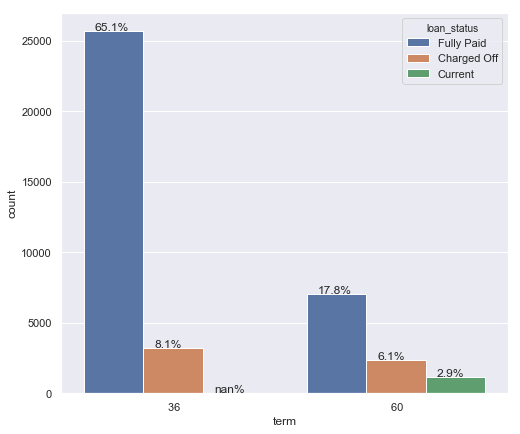

In [339]:
univariate_categorical_plot(df=filtered_data,col='term',hue='loan_status')


High proportion of long term loans seem to have been charged off compared to short term loans.

#### 4.1.4 Home Ownership

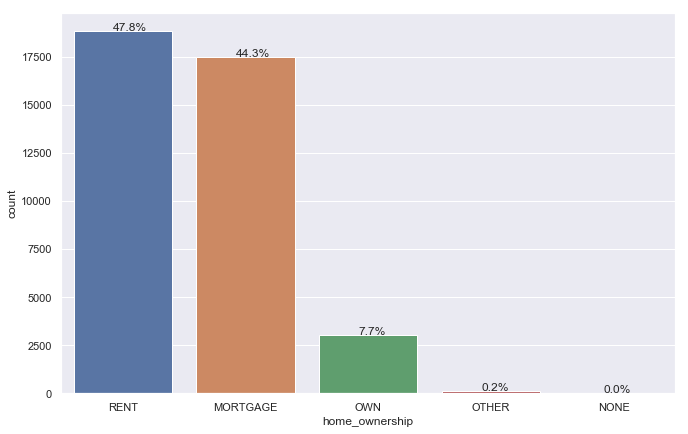

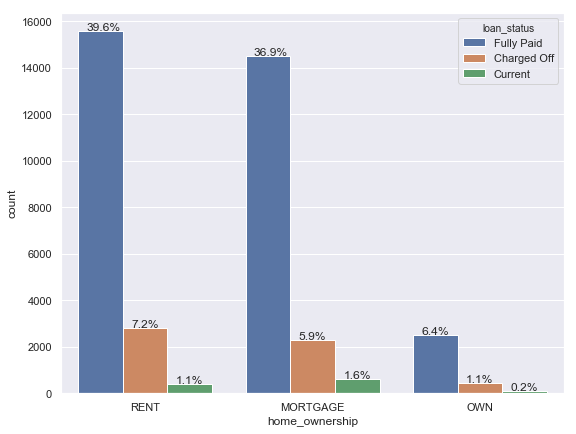

In [340]:
univariate_categorical_plot(df=filtered_data,col='home_ownership')
filtered_data.drop(filtered_data[filtered_data['home_ownership'].isin(['OTHER','NONE'])].index,inplace=True)
univariate_categorical_plot(df=filtered_data,col='home_ownership',hue='loan_status')

Did some data cleaning as very less found with other than RENT, MORTGAGE & OWN type of ownerships.


#### 4.1.5 Year

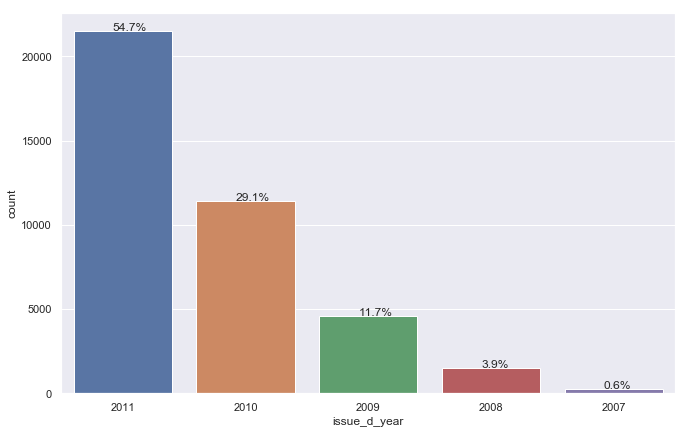

In [341]:
univariate_categorical_plot(df=filtered_data,col='issue_d_year')

#### 4.1.6 State

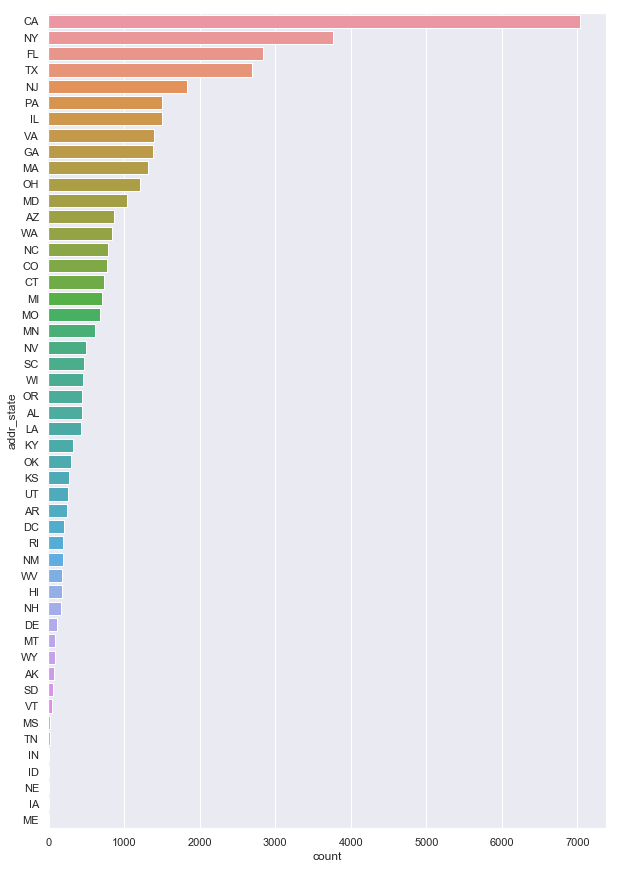

In [342]:
plt.figure(figsize=(10, 15))
sns.countplot(y="addr_state", data=filtered_data, order=filtered_data["addr_state"].value_counts().index )
plt.show()

Calfornia, New York, Florida & Texas are top loan takers

#### 4.1.7 Delinquency Cases

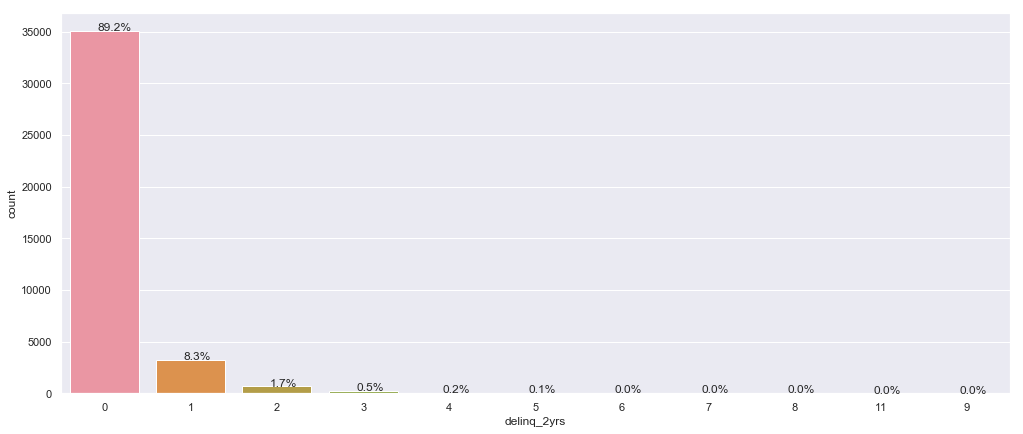

In [343]:
univariate_categorical_plot(df=filtered_data,col='delinq_2yrs')

__Found majority delinquincy cases are zero__

#### 4.1.8 Public Record Bankruptcies

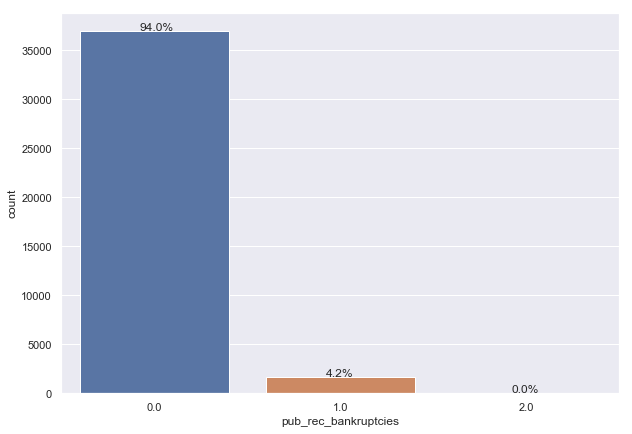

In [344]:
univariate_categorical_plot(df=filtered_data,col='pub_rec_bankruptcies')

__Majority bankruptcies cases found to be zero . Hence will not contribute in further analysis__

Dropping this column as majority is zeros

In [345]:
filtered_data = filtered_data.drop(['pub_rec_bankruptcies'], axis=1)

#### 4.1.9 Grade

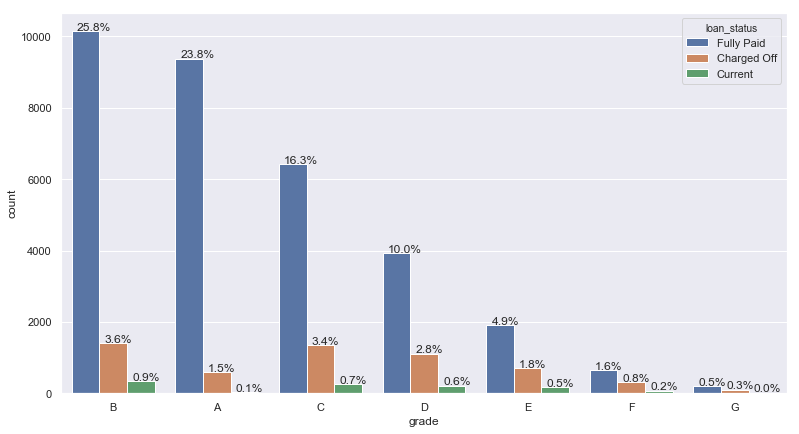

In [346]:
univariate_categorical_plot(df=filtered_data,col='grade',hue='loan_status')

Higher proportion of loans seem to have been charged off for lower grades. But higher loans are given in A and B grade.

#### 4.1.10 Sub-grade

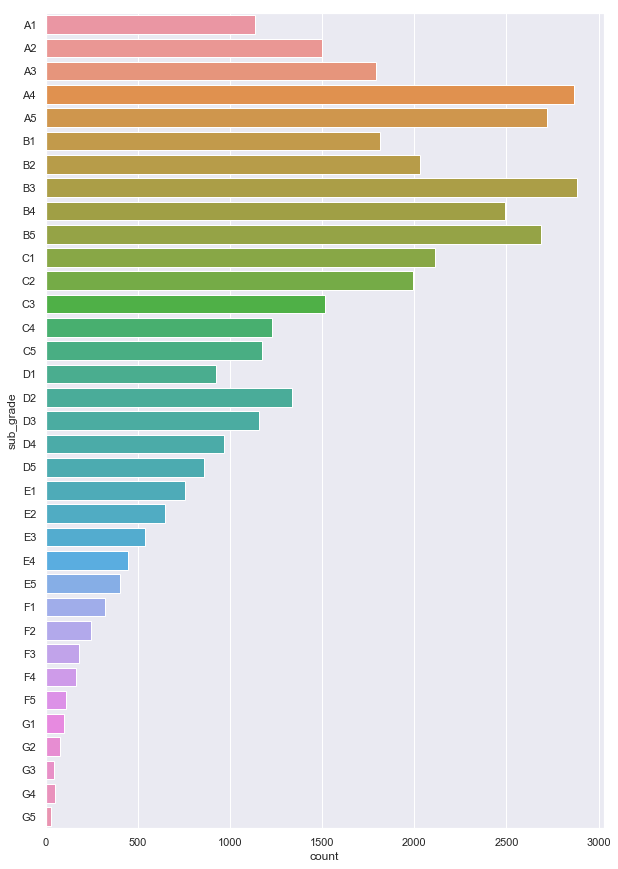

In [347]:
plt.figure(figsize=(10, 15))
sns.countplot(y="sub_grade", data=filtered_data, order=np.sort(filtered_data["sub_grade"].unique()) )
plt.show()

Higher number of loans fall in A4, A5, B3, B4 and B5 category

#### 4.1.11 No. of inquiries

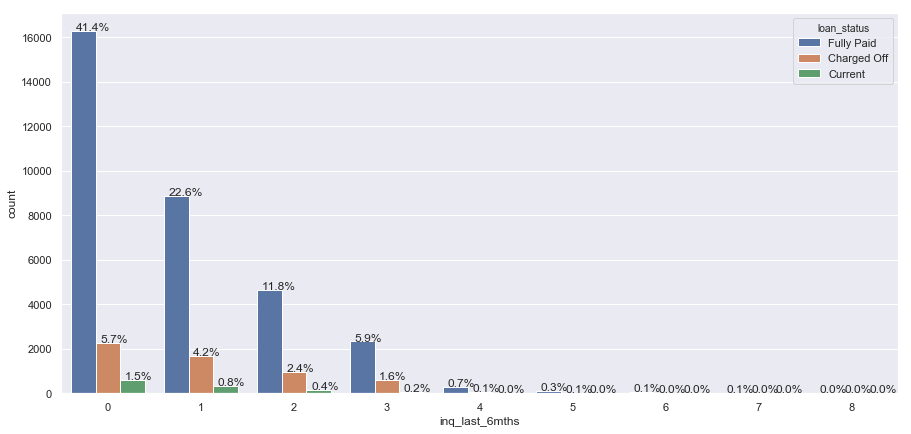

In [348]:
univariate_categorical_plot(df=filtered_data,col='inq_last_6mths',hue='loan_status')

Higher no. of loans are with 0 inquiries and no. of loans are deacreasing as no of inquiries are increasing.

#### 4.1.12 DTI - Debt To Income Ratio

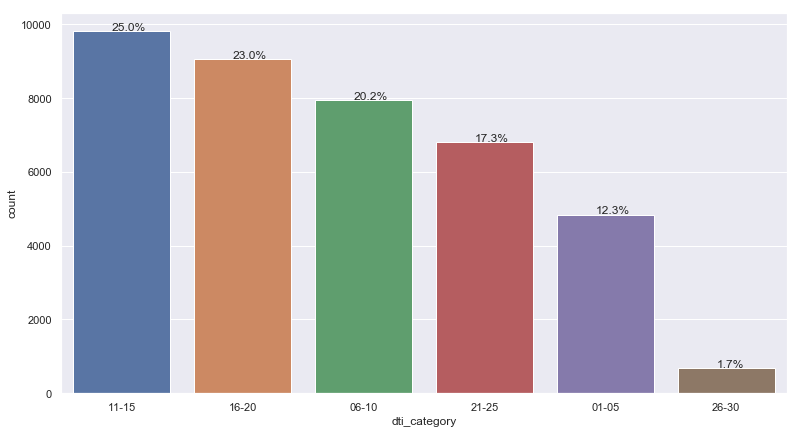

In [349]:
univariate_categorical_plot(df=filtered_data,col='dti_category')

Countplot shows very small percentage of data in the bin '26-30'. Doing outlier treatment for DTI column.

count              39,326.00
mean                   13.37
std                     6.66
min                     0.00
25%                     8.25
50%                    13.47
75%                    18.64
max                    29.99
Name: dti, dtype: float64
24.96


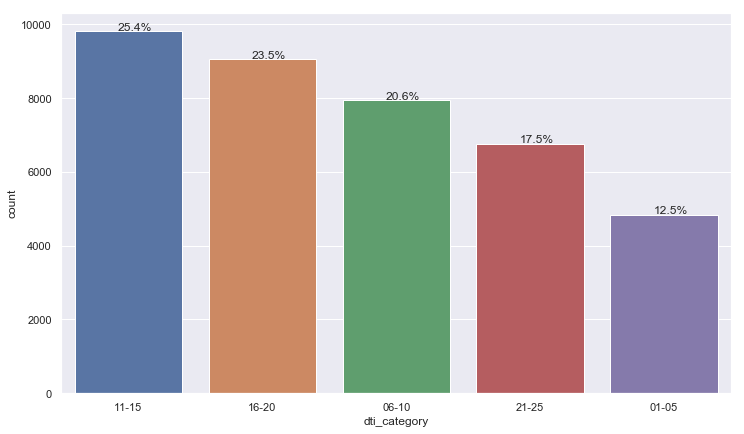

In [350]:
print(filtered_data['dti'].describe())
print(filtered_data.dti.quantile(0.982))
filtered_data = filtered_data[filtered_data.dti < filtered_data.dti.quantile(.982)]
filtered_data['dti_category'] = filtered_data['dti'].apply(lambda x: get_category(x,0,25,5))
univariate_categorical_plot(df=filtered_data,col='dti_category')

### 4.2 Continuous variables

* Here we try to analyse the quantitative variables in the data set with the aim to understand the central tendency and spread of the variable


In [351]:
def univariate_continous_plot(df,col):
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1, ncols=3, figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[col],ax=ax[0])
    ax[1].set_title("Violin Plot")
    sns.violinplot(data =df, x=col, ax=ax[1], inner="quartile")
    ax[2].set_title("Box Plot")
    sns.boxplot(data =df, x=col, ax=ax[2], orient='v')
    plt.show()

#### 4.2.1 Loan Amount 

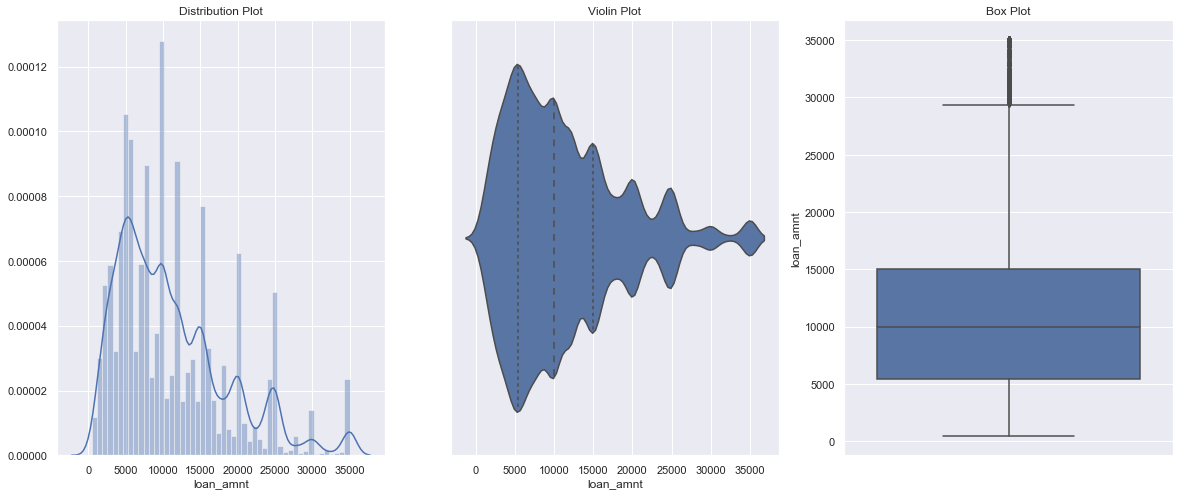

In [352]:
univariate_continous_plot(filtered_data,'loan_amnt')


Most of the loan amounts seem to be in the range of 5000 to 15000 USD. No outlier treatment done. The distribution of loan amount doesnt seem to be normal.

Two other columns of amount can be seen - funded amount, funded amount invested in the dataset. From the description they seem to be related. Checking histograms of the three columns.

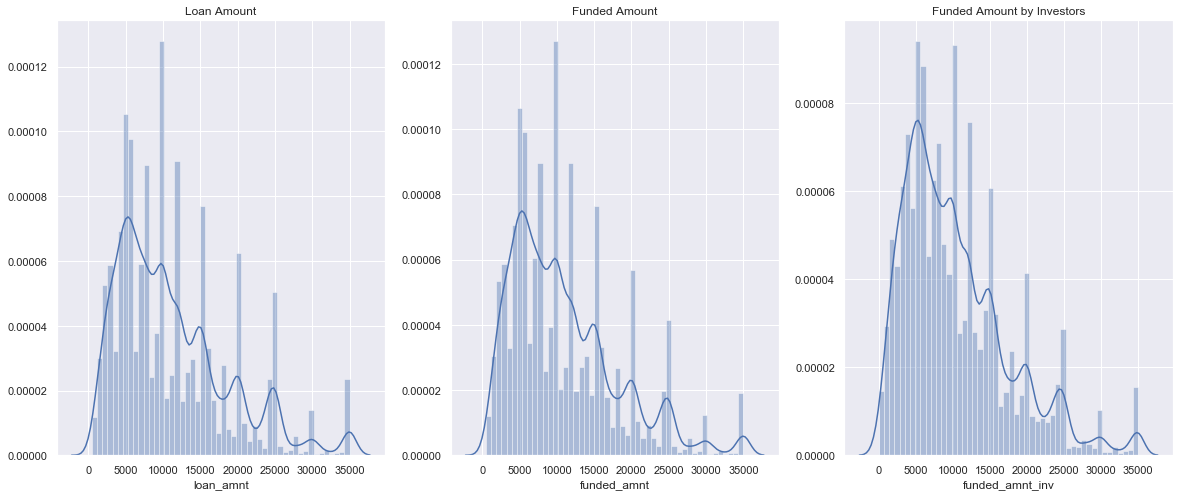

In [353]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1, ncols=3, figsize=(20,8))
ax[0].set_title("Loan Amount")
sns.distplot(filtered_data['loan_amnt'],ax=ax[0])
ax[1].set_title("Funded Amount")
sns.distplot(filtered_data['funded_amnt'],ax=ax[1])
ax[2].set_title("Funded Amount by Investors")
sns.distplot(filtered_data['funded_amnt_inv'],ax=ax[2])
plt.show()

Their histograms look exactly similar. Will be checking correlation among them during bivariate analysis.
Can conclude in most cases, entire loan amount requested was funded and most of it lent by the investors.

#### 4.2.2 Interest Rate

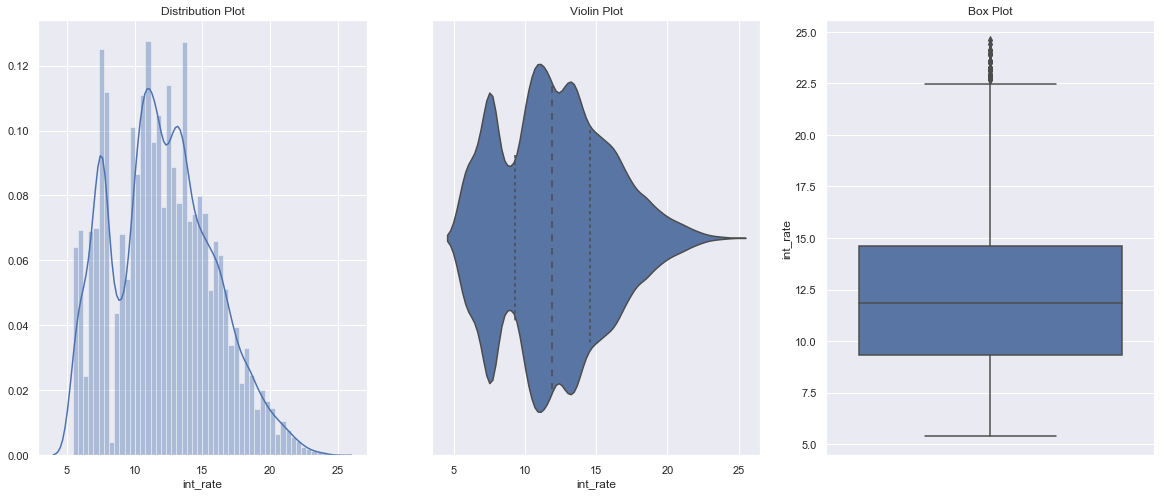

count              38,615.00
mean                   12.05
std                     3.72
min                     5.42
25%                     9.32
50%                    11.86
75%                    14.59
max                    24.59
Name: int_rate, dtype: float64

In [354]:
univariate_continous_plot(filtered_data,'int_rate')
filtered_data['int_rate'].describe()

Interest rate seems to be mostly distributed between 9% & 15%

#### 4.2.3 Annual Income

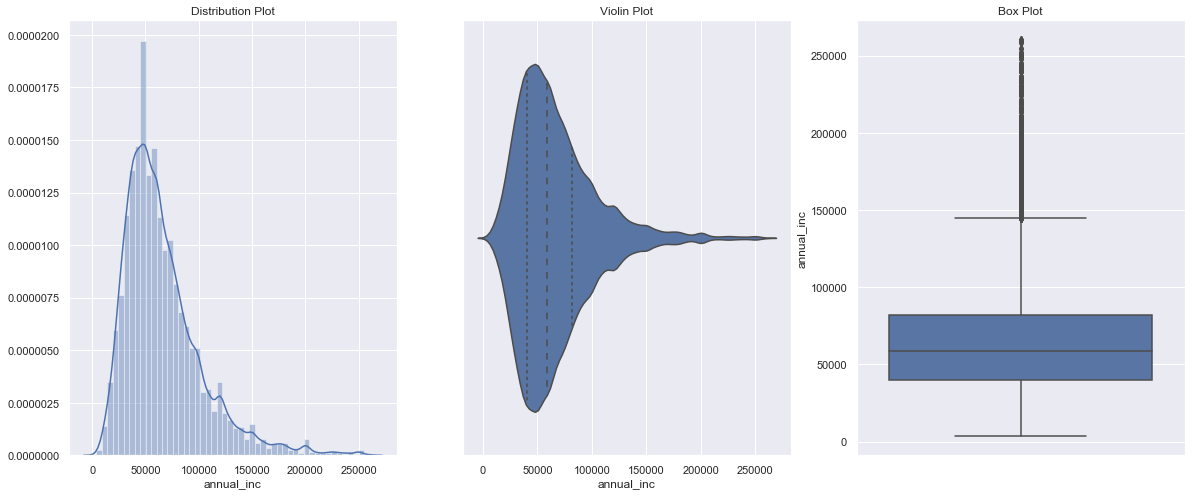

In [355]:
univariate_continous_plot(filtered_data,'annual_inc')

#### 4.2.3 Recoveries

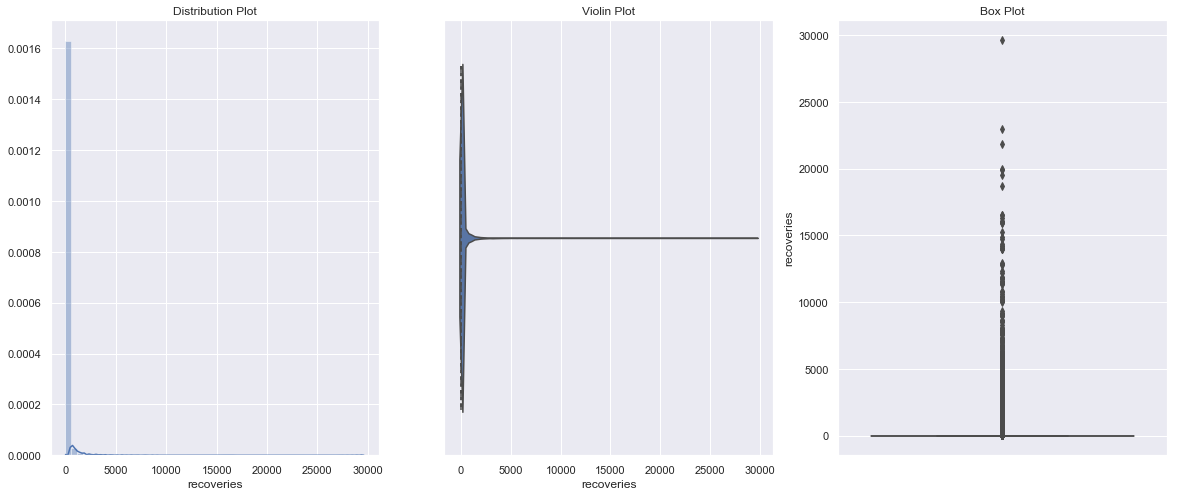

count              38,615.00
mean                   95.45
std                   691.22
min                     0.00
25%                     0.00
50%                     0.00
75%                     0.00
max                29,623.35
Name: recoveries, dtype: float64

In [356]:
univariate_continous_plot(filtered_data,'recoveries')
filtered_data['recoveries'].describe()

__As most of the values of recoveries are zero and morover this signifies post defaulters recovery . This feature will not play a role in analysis further__

Dropping this column as majority is zeros

In [357]:
filtered_data = filtered_data.drop(['recoveries'], axis=1)
print(filtered_data.shape)

(38615, 50)


## 5. Segmented Univariate Analysis
The aim of this section is to understand the metrics of continuous variables in the dataset across different category segments /dimensions

### 5.1 Understanding Loan Amount distribution in Segments

#### 5.1.1 Year wise

Text(0.5, 1.0, 'Average Loan Amount Across Years')

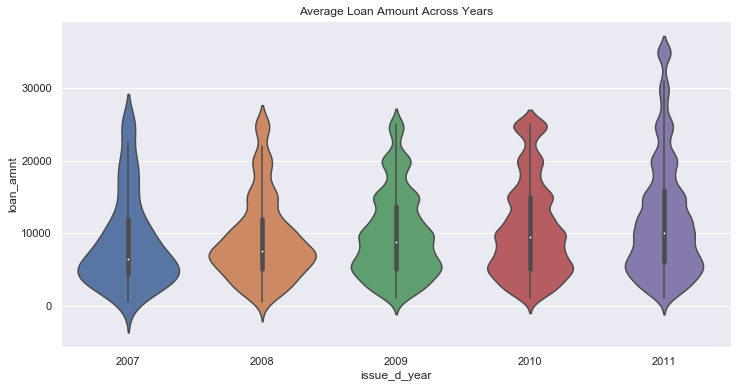

In [358]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='issue_d_year', y='loan_amnt', data=filtered_data)
plt.title("Average Loan Amount Across Years")

Average loan amount and total loan amount has been steadily increasing over the years.

#### 5.1.2 Grade wise

Text(0.5, 1.0, 'Average Loan Amount Across Grades')

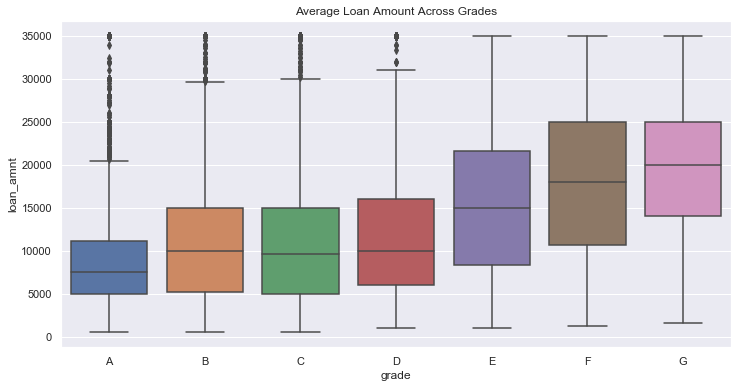

In [359]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='grade', y='loan_amnt', data=filtered_data,order=["A", "B","C", "D","E", "F","G"])
plt.title("Average Loan Amount Across Grades")

The larger loan amounts seems to be falling in lower grades. Lower grades showing steady increase in mix, max & median loan amount in these segments.

#### 5.1.3 Term wise

Text(0.5, 1.0, 'Average Loan Amount Across Loan Term')

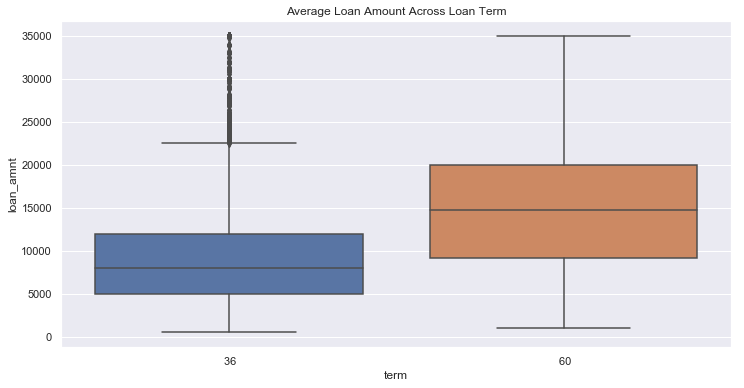

In [360]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='term', y='loan_amnt', data=filtered_data)
plt.title("Average Loan Amount Across Loan Term")

Larger loans have higher loan term.

### 5.2 Segment Analysis on Interest Rate

#### 5.2.1 Year Wise 

Text(0.5, 1.0, 'Average Interest Rate Across Years')

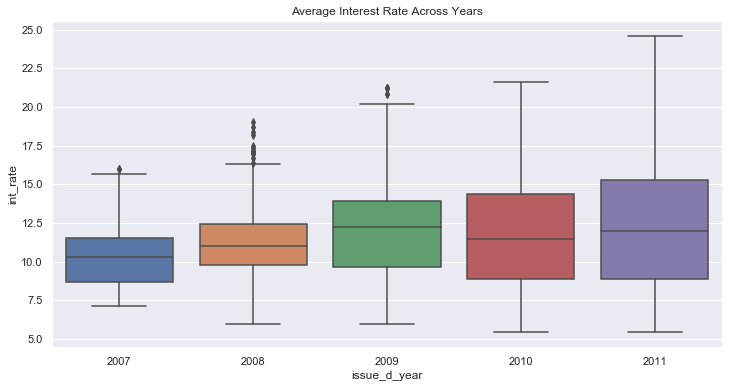

In [361]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='issue_d_year', y='int_rate', data=filtered_data)
plt.title("Average Interest Rate Across Years")

#### 5.2.2 Grade wise

Text(0.5, 1.0, 'Average Interest Rate Across Grades')

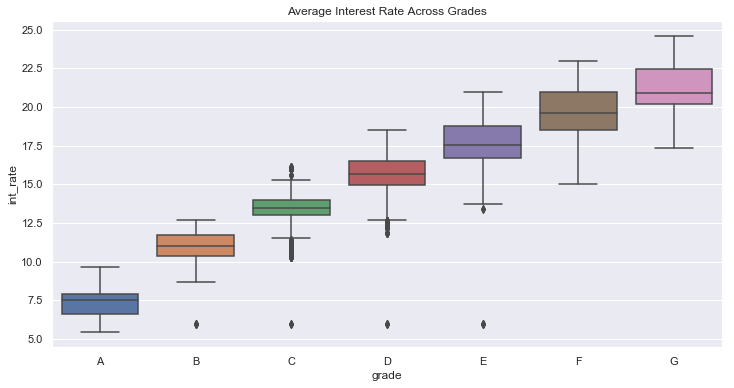

In [362]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='grade', y='int_rate', data=filtered_data, order=["A", "B","C", "D","E", "F","G"])
plt.title("Average Interest Rate Across Grades")

Higher interest rates as the grades move towards G indicate they are lower grades and customers with such grades were charged higher interest rates

### 5.3 Segment Analysis on Annual Income

#### 5.3.1 Address State Wise

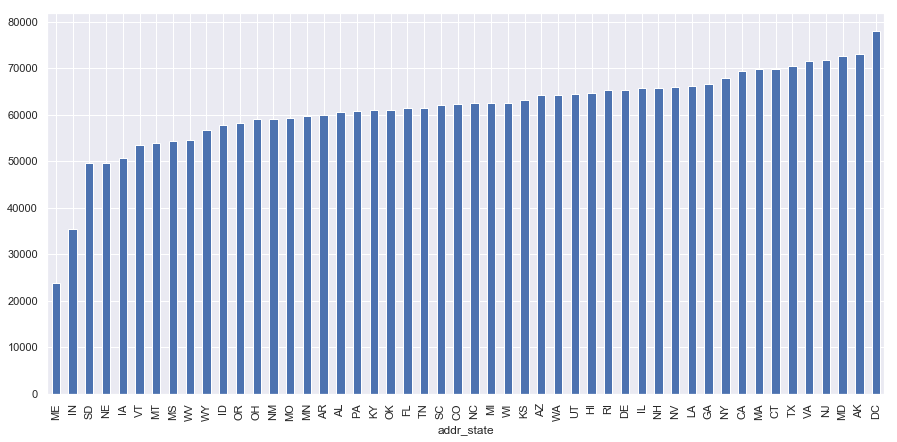

In [363]:
#Segment Annual income area wise
fig, ax = plt.subplots(figsize=(15,7))
filtered_data.groupby(['addr_state']).mean()['annual_inc'].sort_values().plot(ax=ax, kind='bar')


Average annual income can be seen varying for different states. Income & living expenses are further going to be affected by the city. Top income state like District of columbia  seem to also have lower defaulting ratio. And lower income states like NE (Nebraska) have higher defaulting ratio.But this is not true for all states.

#### Summary:
1. Segmented univariate analysis was done to understand how quantitative data is distributed across dimensions.
2. This analysis helped understand what segments to consider during bi-variate segmented analysis to find driver variables.
3. Only Domain relevant Segmented analysis done. Further more segmented analysis across relevant dimensions identified is done in below sections to compare between fully paid and charged off loans.


## 6. Bivariate/ Multivariate Analysis
This section explores relationships between all the category and continuous variables found above with the aim to identify which of the variables drive default.

### 6.1 Understanding Multicollinearity in the data
 Checking correlations of continuous varables through heatmap</h4>

In [364]:
#Draw Heatmap
def draw_heatmap(exclude=None): 
    plt.subplots(figsize=(20,10))
    if exclude is not None:
        columns=[col for col in filtered_data.columns if col not in exclude]
    else:
        columns=filtered_data
        
    data=filtered_data[columns]    
    corr=data.corr()
    sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

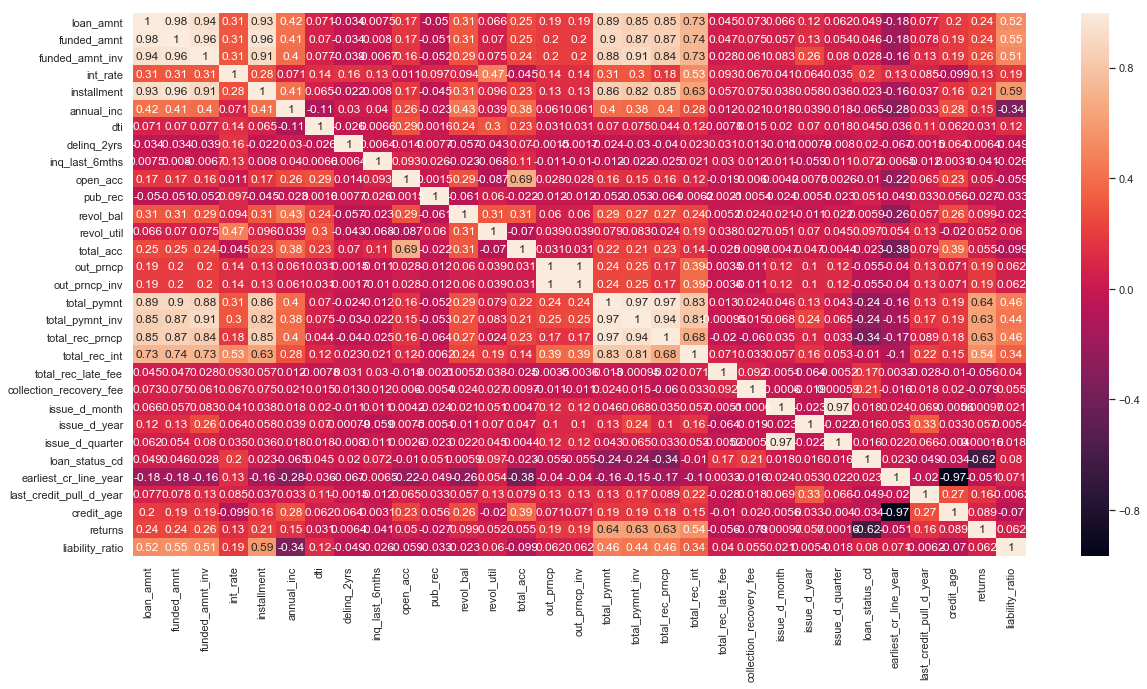

In [365]:
draw_heatmap(exclude=[])

As suspected, some of the amount columns seem to be highly correlated. We will be removing highly correlated columns from dataset and keep only one of them for further analysis
* Loan amount, funded amount, invested funded amount, installment are highly correlated.
* Total payment, total payment inv , total rec principal and total rec int are highly correlated.


In [366]:
# Drop highly related columns
####We will be using loan amount for all further analysis
to_drop = ['funded_amnt','funded_amnt_inv','installment','total_pymnt_inv','total_rec_prncp','total_rec_int']
# Drop features 
filtered_data=filtered_data.drop(filtered_data[to_drop], axis=1)


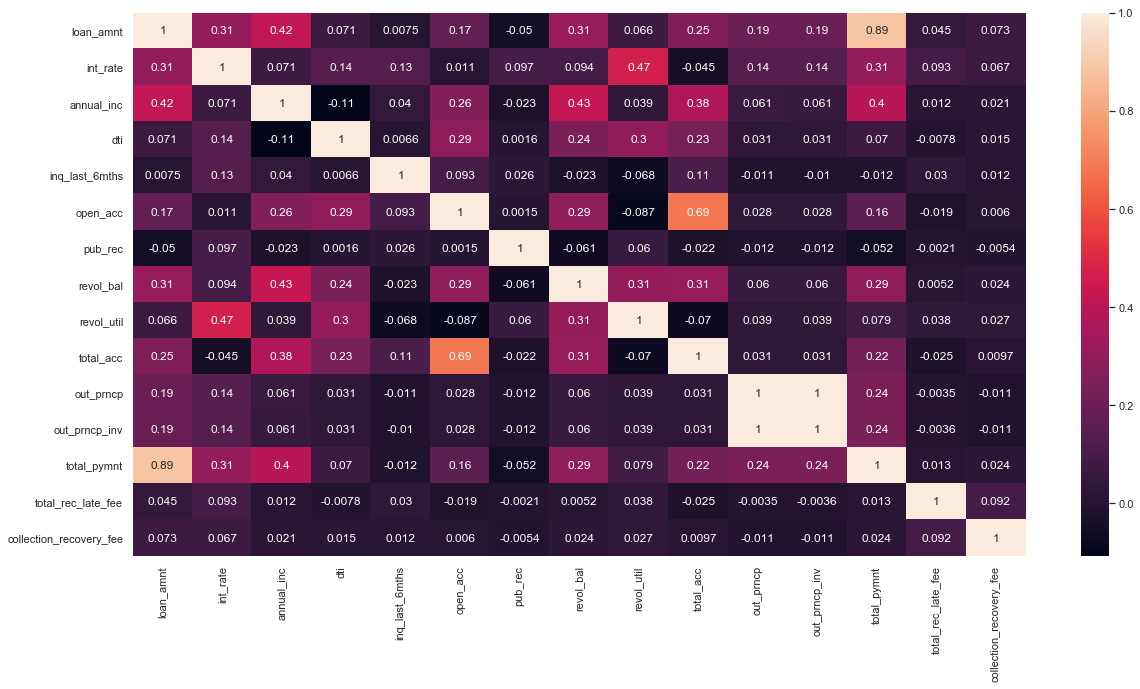

In [367]:
#Exclude derived variables and categorical variables from plotting like: 
#roi,liability_ratio,issue_d,issue_d_month,issue_d_quarter,issue_d_year,pub_rec_bankruptcies,term,emp_length,delinq_2yrs,earliest_cr_line,last_credit_pull_d,earliest_cr_line_year,last_credit_pull_d_year,credit_age
exclusions=['roi','liability_ratio','issue_d','issue_d_month','issue_d_quarter','issue_d_year','pub_rec_bankruptcies','term','emp_length','delinq_2yrs','loan_status_cd','earliest_cr_line','last_credit_pull_d','earliest_cr_line_year','last_credit_pull_d_year','credit_age','returns']

draw_heatmap(exclude=exclusions)

In [368]:
print(filtered_data.shape)

(38615, 44)


### 6.2 Understanding how Annual Income & DTI influence default

__Lets, first find influence of Annual Income__

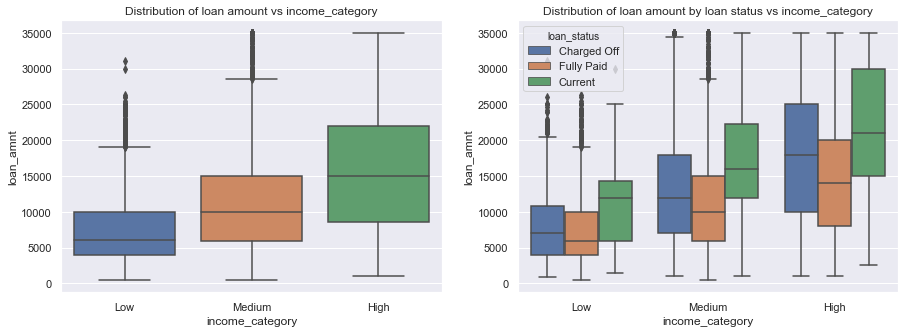

In [369]:
plot_boxplot_vs_loan_amount('income_category')

Lets understand distribution of other columns such as total credit lines, open credit lines, interest rate and dti by income category

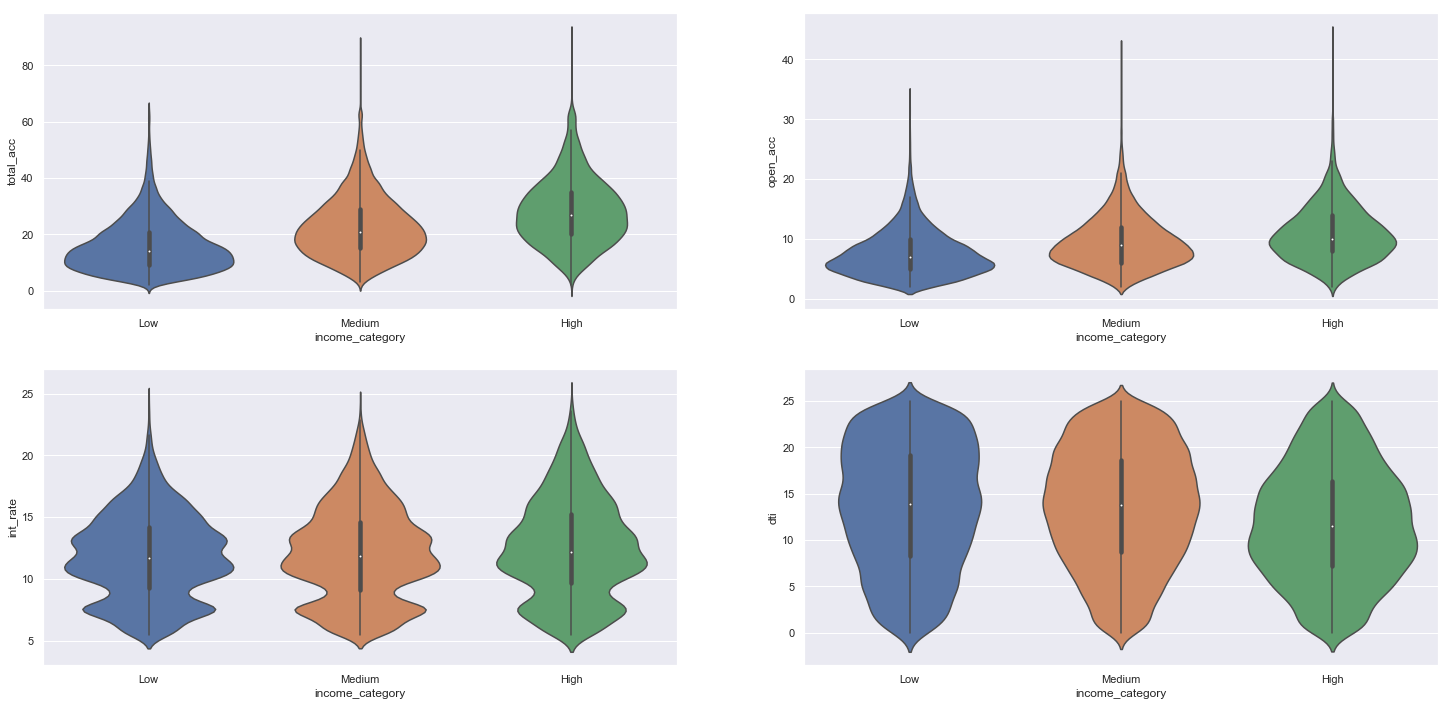

In [370]:
fig, ax = plt.subplots(figsize=(25,12), ncols=2, nrows=2)
sns.violinplot( x=filtered_data['income_category'], y=filtered_data['total_acc'], kde=True, ax=ax[0][0])
sns.violinplot( x=filtered_data['income_category'], y=filtered_data['open_acc'], kde=True, ax=ax[0][1])
sns.violinplot( x=filtered_data['income_category'], y=filtered_data['int_rate'], kde=True, ax=ax[1][0])
sns.violinplot( x=filtered_data['income_category'], y=filtered_data['dti'], kde=True, ax=ax[1][1])

<a id='Annual_Income'></a>Now, find perecentage of charged off loans by income category

<Figure size 960x480 with 0 Axes>

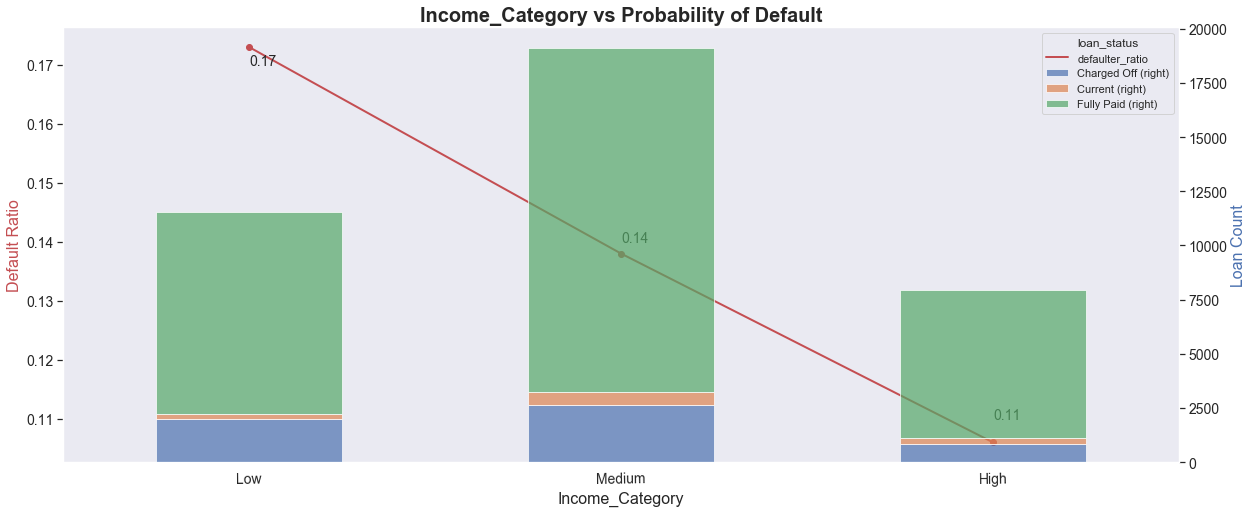

In [371]:
plot_defaulter_percentage(filtered_data, 'income_category', orderByDefaulterRatio=True)

__Analysis summary:__

1. As income increases, loan amount is also increasing.
2. There is not much difference in interest rate by income category
3. Most of the people in Low and Medium income category have more than 15 dti where as it is less than 10 dti for High income group.
4. Medium income group have taken more number of loans than Low and High
5. Defaulter ratio is high for Low income category. __Hence, we can say that Annual Income is clearly driving charged off loans.__

__Now, we will see influence of dti__<a id='DTI'></a>

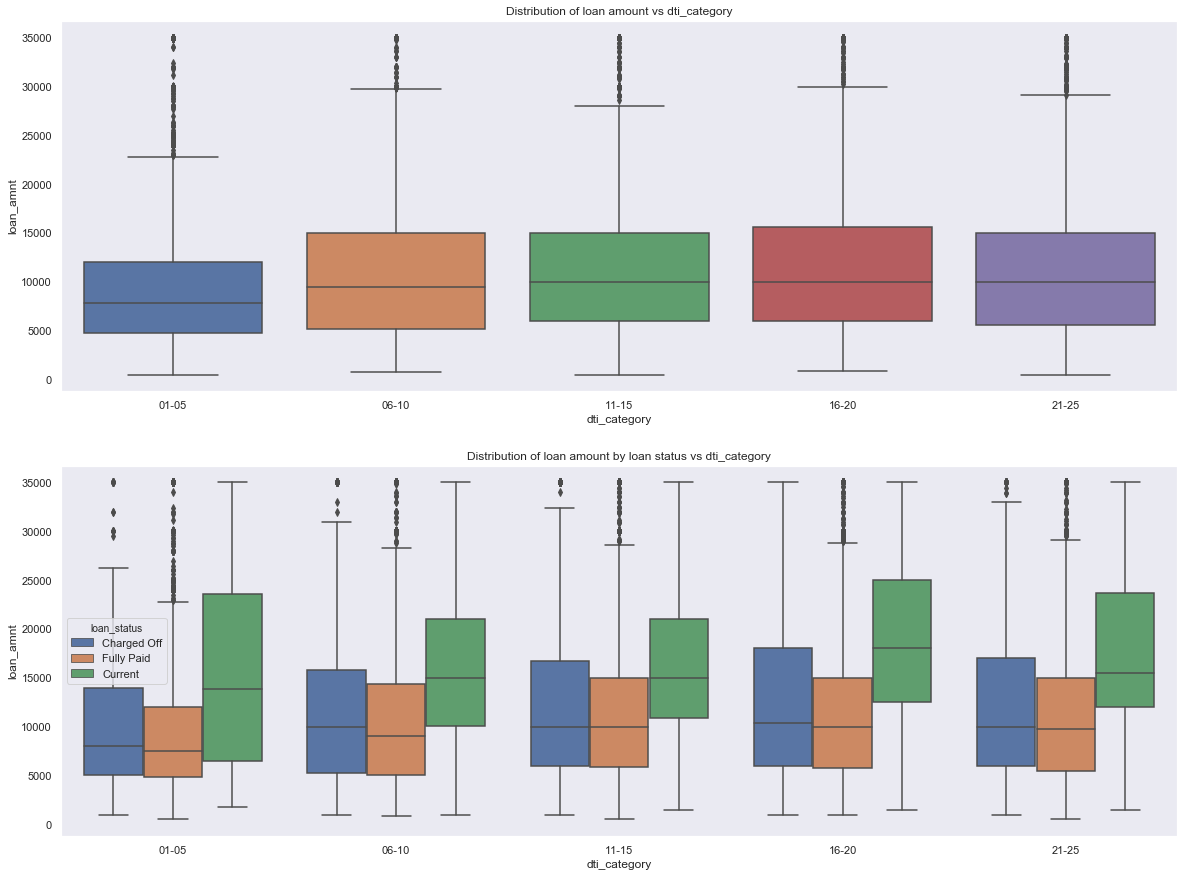

In [372]:
plot_boxplot_vs_loan_amount('dti_category', order=get_steps(0,25,5), figsize=(20,15), nRow=2, nCol=1)

<Figure size 960x480 with 0 Axes>

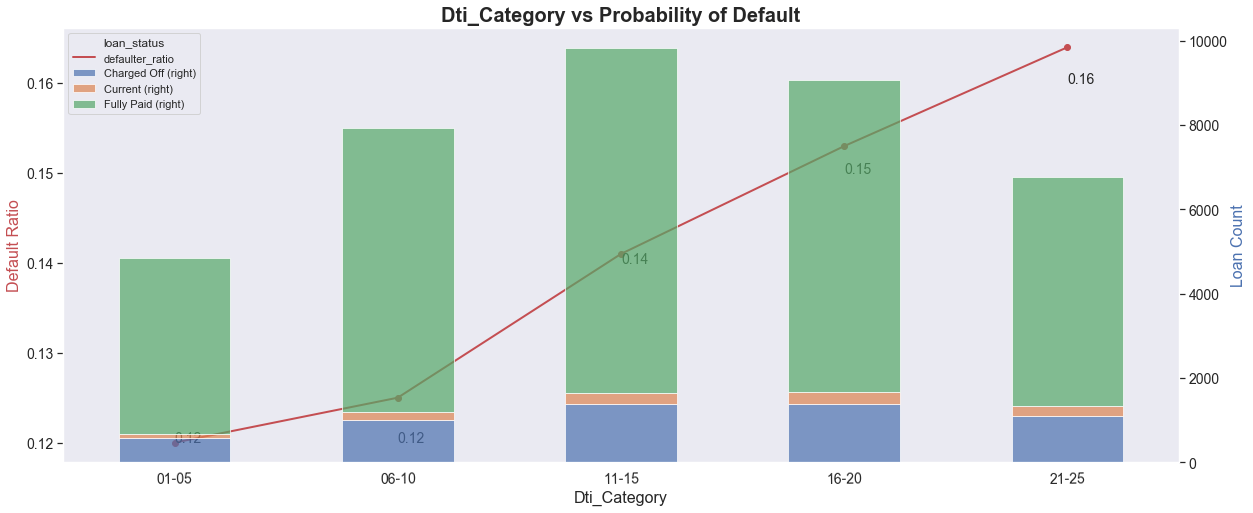

In [373]:
plot_defaulter_percentage(filtered_data, 'dti_category')

__Analysis summary:__
1. People with high dti ratio have taken higher loan amount than people with low dti ratio.
2. It looks like as dti ratio is incleasing, chances of being charged off are also increasing.
3. Higher DTI indicates, debt being a higher percentage of income and thereby a clear indicator of default.

### 6.3 Does employment affect default?

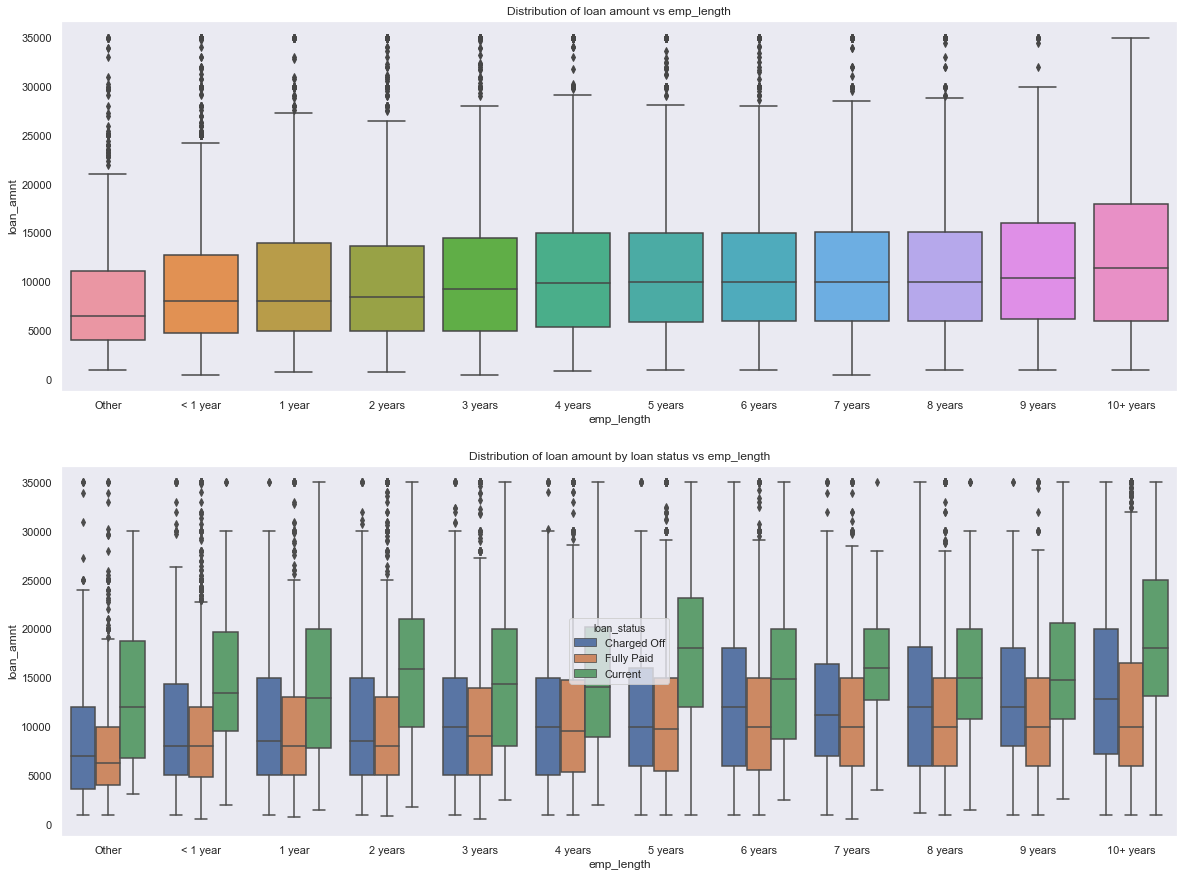

In [374]:
plot_boxplot_vs_loan_amount('emp_length',figsize=(20,15), nRow=2, nCol=1, order=['Other', '< 1 year', '1 year',
                    '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])

<Figure size 960x480 with 0 Axes>

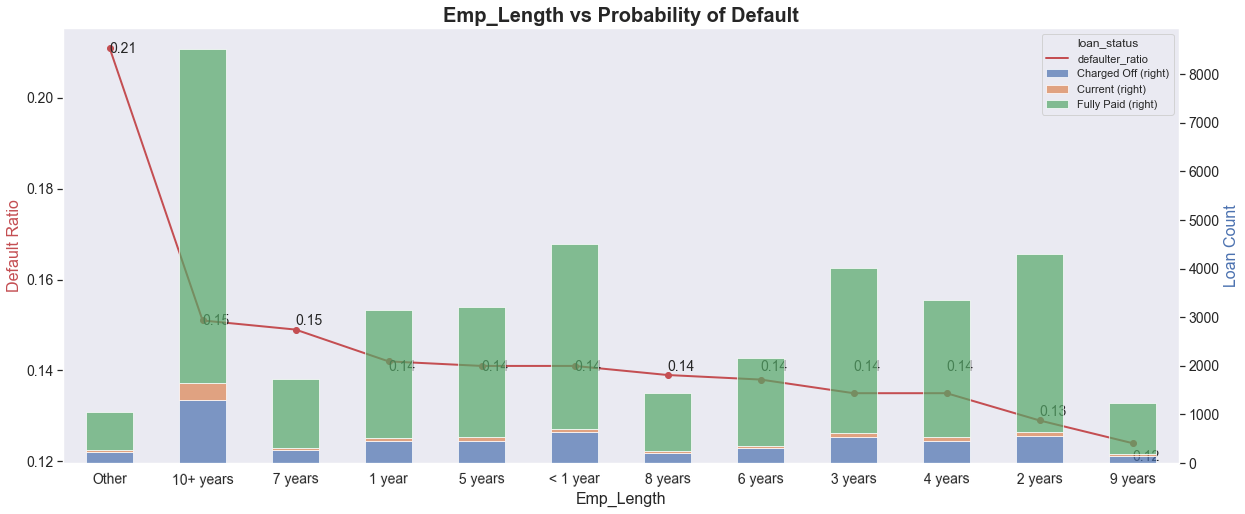

In [375]:
plot_defaulter_percentage(filtered_data, 'emp_length', orderByDefaulterRatio=True)

__Analysis summary:__
1. Loan amount increaes slightly with employment length of people.
2. Other employment length has higher defaulier ration but other than that there is no sigificant difference in terms of charged off % by employment length.

### 6.4 Understanding Term, Interest Rates, Grades & Subgrades

#### 6.4.1 Term Vs Default<a id='Term'></a>

<Figure size 640x400 with 0 Axes>

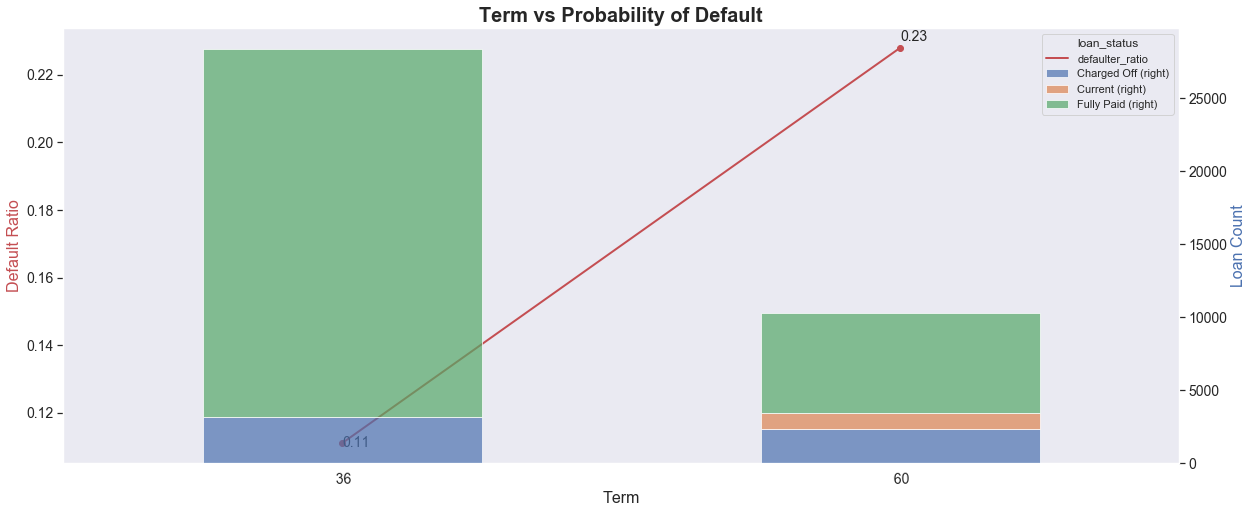

In [376]:
#Plot percentage of defaulter for different loan terms
plot_defaulter_percentage(filtered_data,'term',plt_width=8, plt_height=5)

__Analysis summary: Term__
1. Higher ratio of defaulters(~23%) are seen in 60 month loan term compared to 11% defaulters in 36 month loan term
2. This is definitely a driver variable indicating that borrowers who borrow loans for longer duration(60 months) tend to default more.

#### 6.4.2 Interest Rate Vs Default <a id='InterestRate'></a>

<Figure size 1280x640 with 0 Axes>

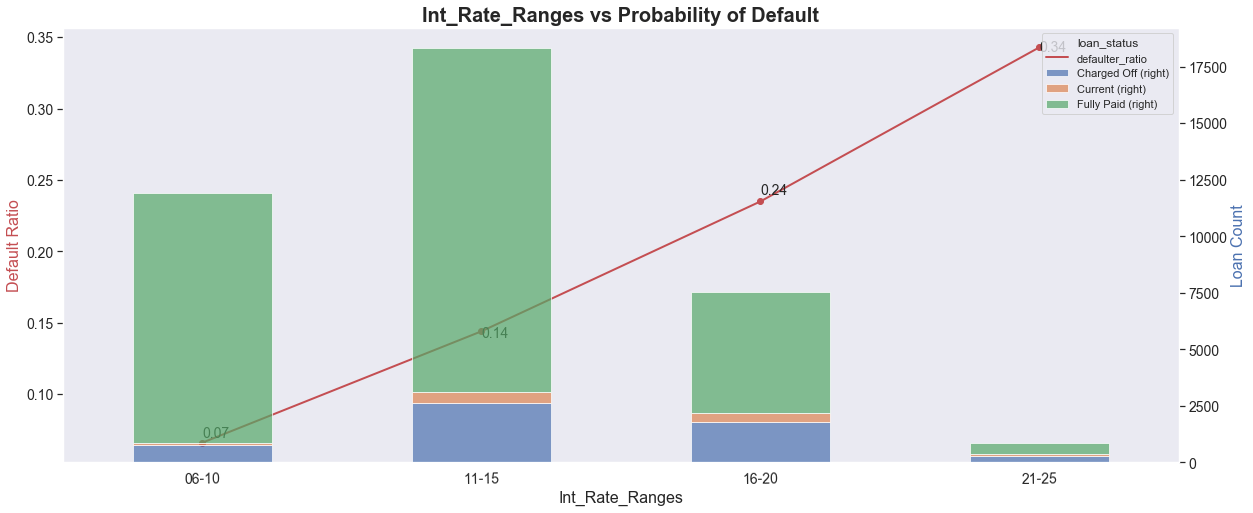

In [377]:
#Plot percentage of defaulter for different interest rates
plot_defaulter_percentage(filtered_data,'int_rate_ranges',plt_width=16, plt_height=8)

As interest rate increases, defaulters ratio increases. But we have very few loans in higher range . Most of the loans are in 11-15% intereset rate with ~14% defaulters.

#### 6.4.3 Year on Year Average Interest rate by Loan status

Text(0.5, 1.0, 'Average Interest rate by Loan status')

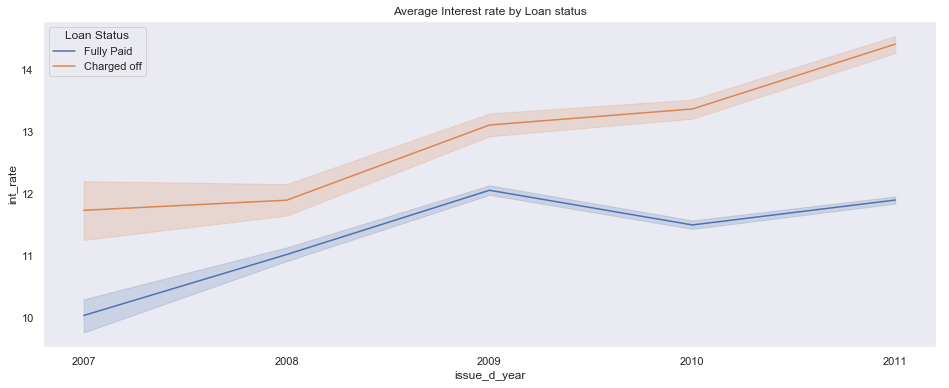

In [378]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x="issue_d_year", y="int_rate",hue="loan_status_cd", data=filtered_data, legend=False)
ax.set(xticks=np.sort(filtered_data['issue_d_year'].unique()))
plt.legend(title='Loan Status', loc='upper left', labels=['Fully Paid', 'Charged off'])
plt.title("Average Interest rate by Loan status")

Year on Year average interest rate is higher for charged-off loans

__Analysis Summary: Interest Rate__
1. Interest rate is always higher for default loans
2. Highest ratio of defaulters is seen on 21-25% interest rate range
3. Defaulter ratio increases as interest rate increases 
4. So, interest rate is a driver variable with chances of default increasing as interest rate increases

#### 6.4.4 Grade Vs Default<a id='Grade'></a>

<Figure size 1280x640 with 0 Axes>

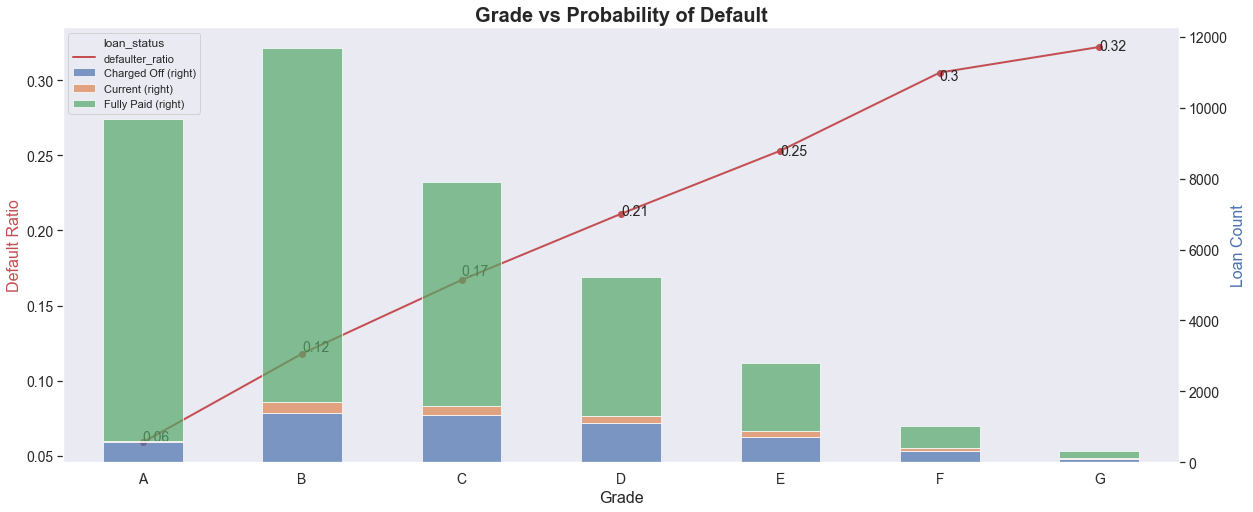

In [379]:
#Plot percentage of defaulter for different grades
plot_defaulter_percentage(filtered_data,'grade',plt_width=16, plt_height=8)

We can see that grade impacts chances of default. As the grade increases(A to F), defaulters ratio increases.

#### 6.4.5 Year on year change in loan amount in each grade

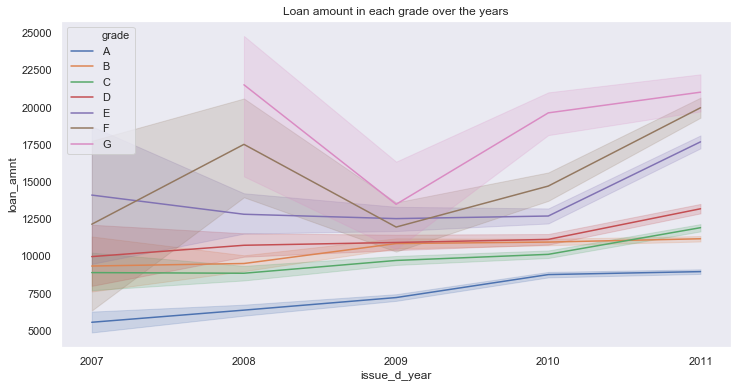

In [380]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x="issue_d_year", y="loan_amnt",hue="grade", data=filtered_data, hue_order=np.sort(filtered_data['grade'].unique()))
ax.set(xticks=np.sort(filtered_data['issue_d_year'].unique()))
plt.title("Loan amount in each grade over the years")
plt.show()

#### 6.4.6 Interest rate for each grade over the years

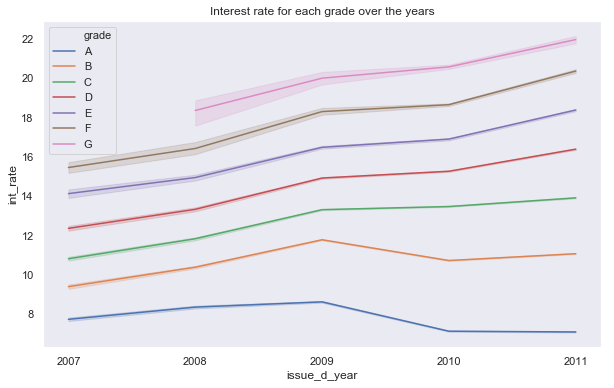

In [381]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="issue_d_year", y="int_rate",hue="grade", data=filtered_data, hue_order=np.sort(filtered_data['grade'].unique()))
ax.set(xticks=np.sort(filtered_data['issue_d_year'].unique()))
plt.title("Interest rate for each grade over the years")
plt.show()

Grades F & G have had consistently higher interest rate over the years

__Analysis Summary: Grade__
1. Ratio of defaulters increase as grade reduces(A to G)
2. Higher loan amounts fall in lower graded year over year.
3. Also interest rate increase as grade falls.
4. So, we can conclude that grade impacts the loan default. Higher the grade, lesser the chances of default and vice-versa.

#### 6.4.7 Interest Rate Vs Term segmented Grade wise

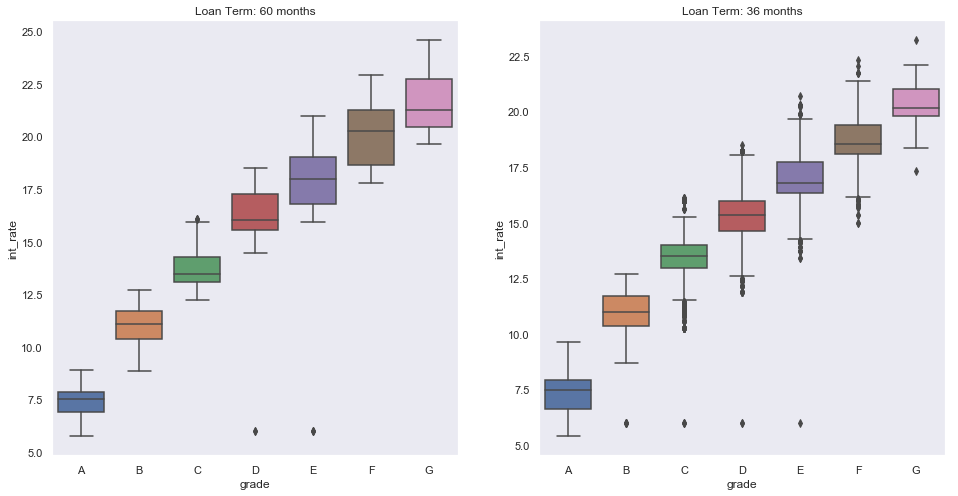

In [382]:
plt.figure(figsize=(16,8))
terms = filtered_data['term'].unique().tolist()
i=1
for term in terms:
    plt.subplot(1, 2, i)
    ax = sns.boxplot(x="grade", y="int_rate", data=filtered_data[filtered_data['term']==term],order=np.sort(filtered_data['grade'].unique()))
    plt.title("Loan Term:" + term + " months")
    i=i+1
plt.show()

Analysis:
1. As the grade decreases, interest rate is higher for 60 month term especially grade E, F and G.
2. There are some outliers in some of the grades for both the terms with lower interest rate
3. Height of the box if greater for grade E, F and G in 60 month term compared to 36 month term.
4. For grade G, we have interest rate greater than median for most of the loans.
5. Overall, we see higher interest in 60 month term especially for lower grades.

#### 6.4.8 Sub Grade Vs Defauters 

<Figure size 1440x1440 with 0 Axes>

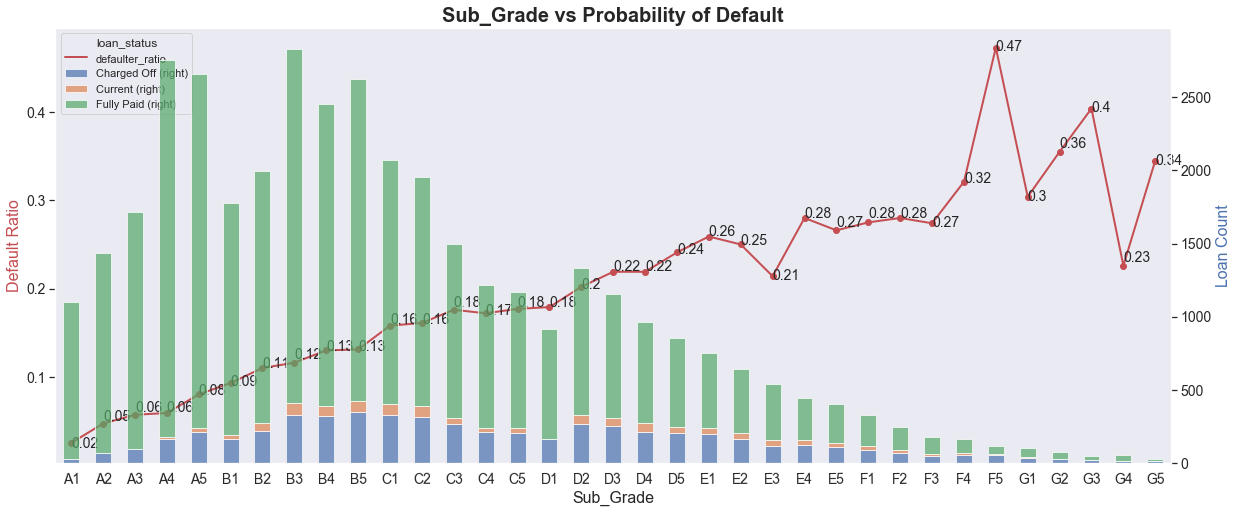

In [383]:
#Plot percentage of defaulter for different sub-grades(top 10)
plot_defaulter_percentage(filtered_data,'sub_grade',plt_width=18, plt_height=18)

1. As sub-grade increases(A to F), defaulters ratio increases.
2. Defaulter ratio drops in between on G1 and G4 but overall defaulter ratio of grade G is still higher.
3. We also notice that as sub-grade increases, number of loans santioned also decreases.

### 6.5 Area Vs Default

#### 6.5.1 Plot Defaulters in each area

<Figure size 1440x1760 with 0 Axes>

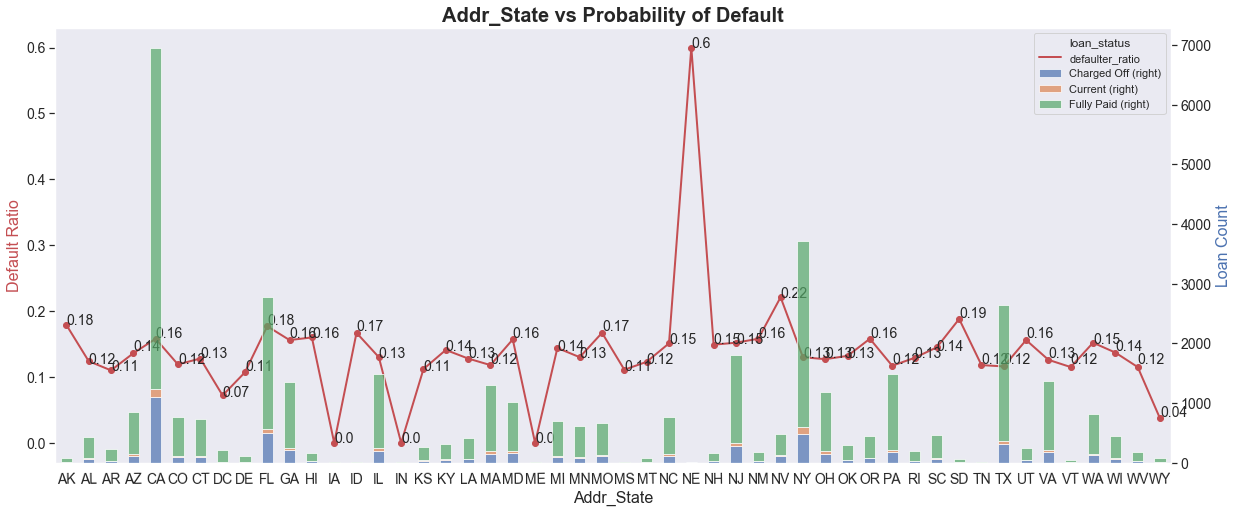

In [384]:
#Plot percentage of defaulter for different areas(top 10)
plot_defaulter_percentage(filtered_data,'addr_state',plt_width=18, plt_height=22)

NE(Nebraska) has highest percentage of defaulter(60%) but loans sanctioned in NE are very less. Among top 10 regions with highest defaulters, FL(Florida) have highest number of loans with ~18% defaulters.

#### 6.5.2 Understanding Grades of defaulters in Top 5 States with highest number of loans

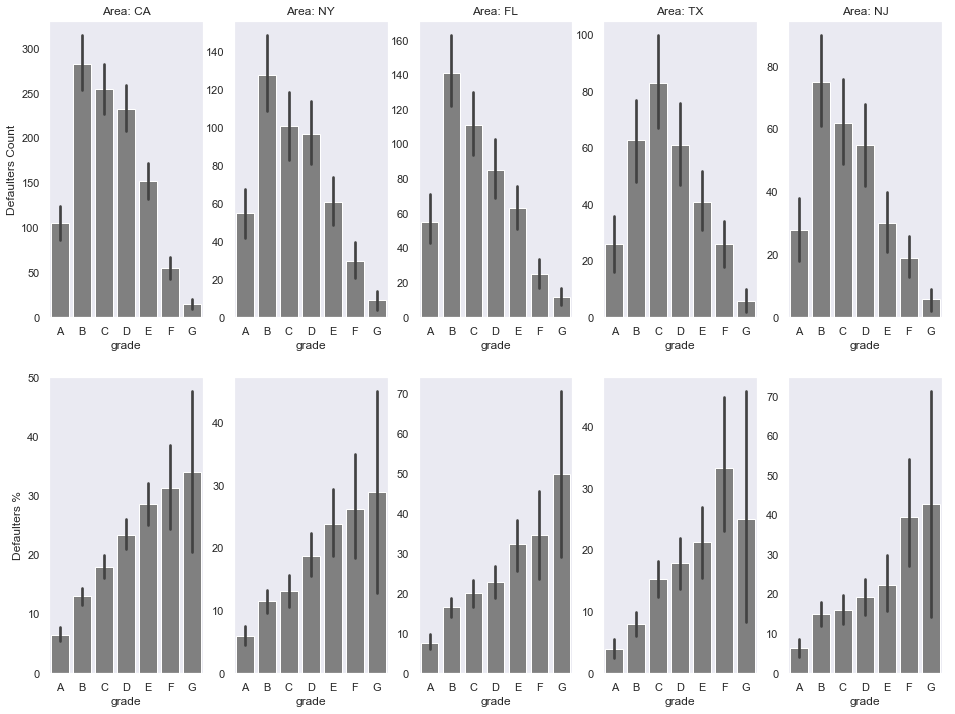

In [385]:
top5 = filtered_data.addr_state.value_counts()[:5].index.tolist()
plt.figure(figsize=(16,12))
order=np.sort(filtered_data['grade'].unique())
i = 1
for area in top5:
    area_df = filtered_data[filtered_data['addr_state']==area]
    plt.subplot(2, 5, i)
    ax = sns.barplot(x="grade", y="loan_status_cd", data=area_df,estimator=sum,order=order,color='grey')
    plt.title("Area: "+ area)
    plt.ylabel('Defaulters Count')
    if i!=1:
        ax.yaxis.label.set_visible(False)
    plt.subplot(2, 5, i+5)
    ax = sns.barplot(x="grade", y="loan_status_cd", data=area_df,estimator=lambda x:sum(x)*100.0/len(x),order=order,color='grey')
    plt.ylabel('Defaulters %')
    if i!=1:
        ax.yaxis.label.set_visible(False)
    i=i+1
plt.show()

Grades E, F & G in these states prove to indicate default.

6.5.2.1 Understanding Annual Incomes of defaulters in Top 10 States with highest number of loans

#### 6.5.3 Understanding Grades of defaulters in Top 5 States with highest ratio of defaults

In [386]:
#Identify top5 states with highest default ratio
areas_crosstab = pd.crosstab(filtered_data['addr_state'], filtered_data['loan_status'],margins=True)
areas_crosstab['defaulter_ratio'] = round((areas_crosstab['Charged Off']/areas_crosstab['All']),3)
top5 = areas_crosstab['defaulter_ratio'].sort_values(ascending=False).index[:5]
print("Top 5 states with highest default ratio are:" + str(top5.tolist()))
areas_crosstab.sort_values(by=['defaulter_ratio'], ascending=False)[:5]

Top 5 states with highest default ratio are:['NE', 'NV', 'SD', 'AK', 'FL']


loan_status  Charged Off  Current  Fully Paid   All      defaulter_ratio
addr_state                                                              
NE                     3        0           2     5                 0.60
NV                   107       17         361   485                 0.22
SD                    12        2          50    64                 0.19
AK                    14        1          63    78                 0.18
FL                   492       77        2216  2785                 0.18

Top 5 states with highest default ration are: Nebraska, Nevada, Alaska, South Dakota and Florida.

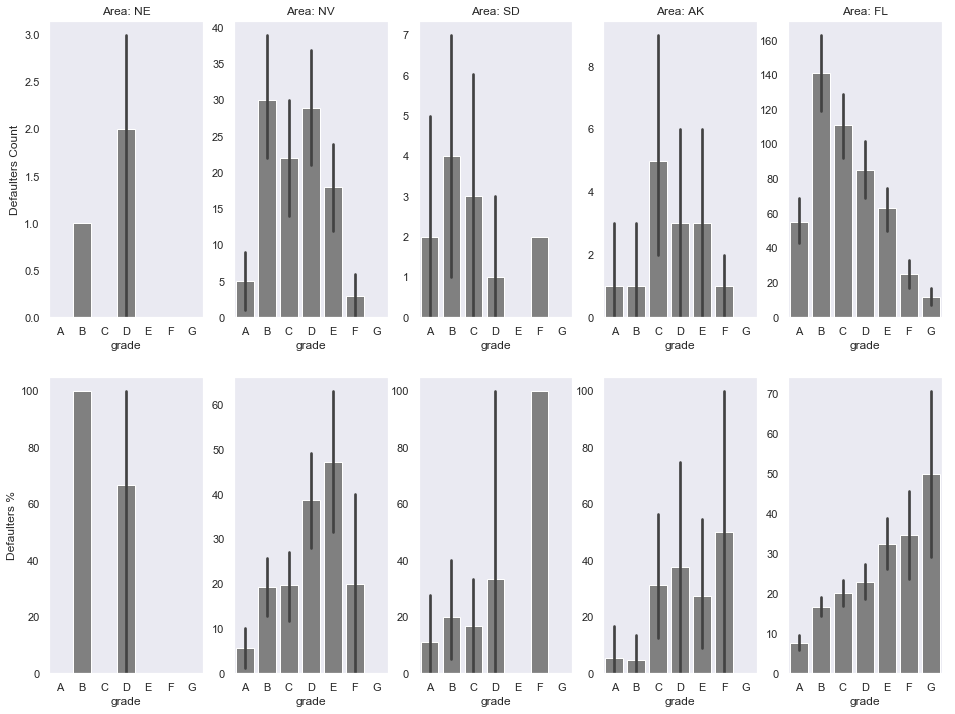

In [387]:
#Plot defaultesr in each grade for these top 5 states
plt.figure(figsize=(16,12))
order=np.sort(filtered_data['grade'].unique())
i = 1
for area in top5:
    area_df = filtered_data[filtered_data['addr_state']==area]
    plt.subplot(2, 5, i)
    ax = sns.barplot(x="grade", y="loan_status_cd", data=area_df,estimator=sum,order=order,color='grey')
    plt.title("Area: "+ area)
    plt.ylabel('Defaulters Count')
    if i!=1:
        ax.yaxis.label.set_visible(False)
    plt.subplot(2, 5, i+5)
    ax = sns.barplot(x="grade", y="loan_status_cd", data=area_df,estimator=lambda x:sum(x)*100.0/len(x),order=order,color='grey')
    plt.ylabel('Defaulters %')
    if i!=1:
        ax.yaxis.label.set_visible(False)
    i=i+1
plt.show()

General trend is that defaulter percentage inceases was grade lowers, but for NE, we see that D grade has less ratio of defaults but we cannot rely on this info as there are only 5 loans in NE.
In NV, we see a sudden drop in default ration from grade E to F but again number of loans in grade F are less compared to E so it is not reliable. 

__Analysis Summary: Area__
1. We see different ratio of defaults in different states some with high default ratio, others with less.
2. If we plot each state grade wise, general trend is that default ratio increases with lower grade. So it will be wrong to put a state in high default list based on overall ratio. For example: for Florida, in grade A default ratio is <.10 which is comparable to other states even though its overall default ratio is high.
3. So, area do have impact on default ratio but area alone cannot be used to determine the impact. Area + grade impacts default ratio.

#### 6.6.5 Zip code Analysis

In [388]:
defaulter_percentage=pd.crosstab(filtered_data['zip_code'], filtered_data['loan_status'], dropna=False)
defaulter_percentage['defaulter_ratio']=defaulter_percentage['Charged Off']*100/(defaulter_percentage['Charged Off']+defaulter_percentage['Current']+defaulter_percentage['Fully Paid'])
defaulter_percentage.sort_values('defaulter_ratio', ascending=False, inplace=True)
charged_off_loans = filtered_data.loc[(filtered_data['loan_status'] == 'Charged Off')]
zip_gp = charged_off_loans.groupby('zip_code') 
loss_df = zip_gp['returns'].agg([np.sum]).sort_values('sum', ascending=False)
merged_df = pd.merge(defaulter_percentage,loss_df,  on='zip_code')
merged_df.sort_values('sum', ascending=True, inplace=True)
merged_df.loc[(merged_df['defaulter_ratio'] > 25) &(merged_df['sum'] < -20000)]

Charged Off  Current  Fully Paid      defaulter_ratio  \
zip_code                                                          
891xx              64       12         174                25.60   
935xx              33        1          65                33.33   
912xx              15        1          30                32.61   
283xx              13        3          35                25.49   
082xx              13        1          33                27.66   
986xx              14        1          39                25.93   
206xx              16        1          42                27.12   
072xx               9        1          25                25.71   
484xx               8        0          22                26.67   
253xx               4        0           7                36.36   
224xx               7        0          19                26.92   
316xx               6        0          11                35.29   
153xx               5        0          14                26.32   
026xx               6        1          16                26.09   
719xx               5        0           6                45.45   
561xx               5        0           2                71.43   
997xx               6        0          14                30.00   
746xx               4        0           2                66.67   
897xx               3        1           3                42.86   
924xx               7        0          13                35.00   
766xx               4        2           7                30.77   
425xx               2        0           4                33.33   
308xx               6        1          16                26.09   
244xx               5        0          12                29.41   
608xx               4        0           4                50.00   
611xx               5        1           8                35.71   
534xx               4        0          11                26.67   
607xx               7        0           7                50.00   
744xx               5        0           6                45.45   

                          sum  
zip_code                       
891xx             -349,803.93  
935xx             -148,747.05  
912xx             -145,027.73  
283xx              -67,182.30  
082xx              -64,232.76  
986xx              -59,265.59  
206xx              -50,913.18  
072xx              -50,399.53  
484xx              -48,230.92  
253xx              -43,551.99  
224xx              -41,868.82  
316xx              -39,252.84  
153xx              -33,733.51  
026xx              -31,385.13  
719xx              -30,498.97  
561xx              -29,887.23  
997xx              -29,559.52  
746xx              -26,228.59  
897xx              -25,146.75  
924xx              -24,937.45  
766xx              -24,791.24  
425xx              -24,789.12  
308xx              -22,734.05  
244xx              -22,366.72  
608xx              -21,289.70  
611xx              -21,236.93  
534xx              -20,910.49  
607xx              -20,806.37  
744xx              -20,692.43

This analysis helps to identify the locations within states with high probability of default(>25%) and total loss amounted to greated than $20000 
LC can be cautious in lending to such zip codes in the future

### 6.6 No. of inquiries in past 6 months influence default<a id='no_of_inq'></a>

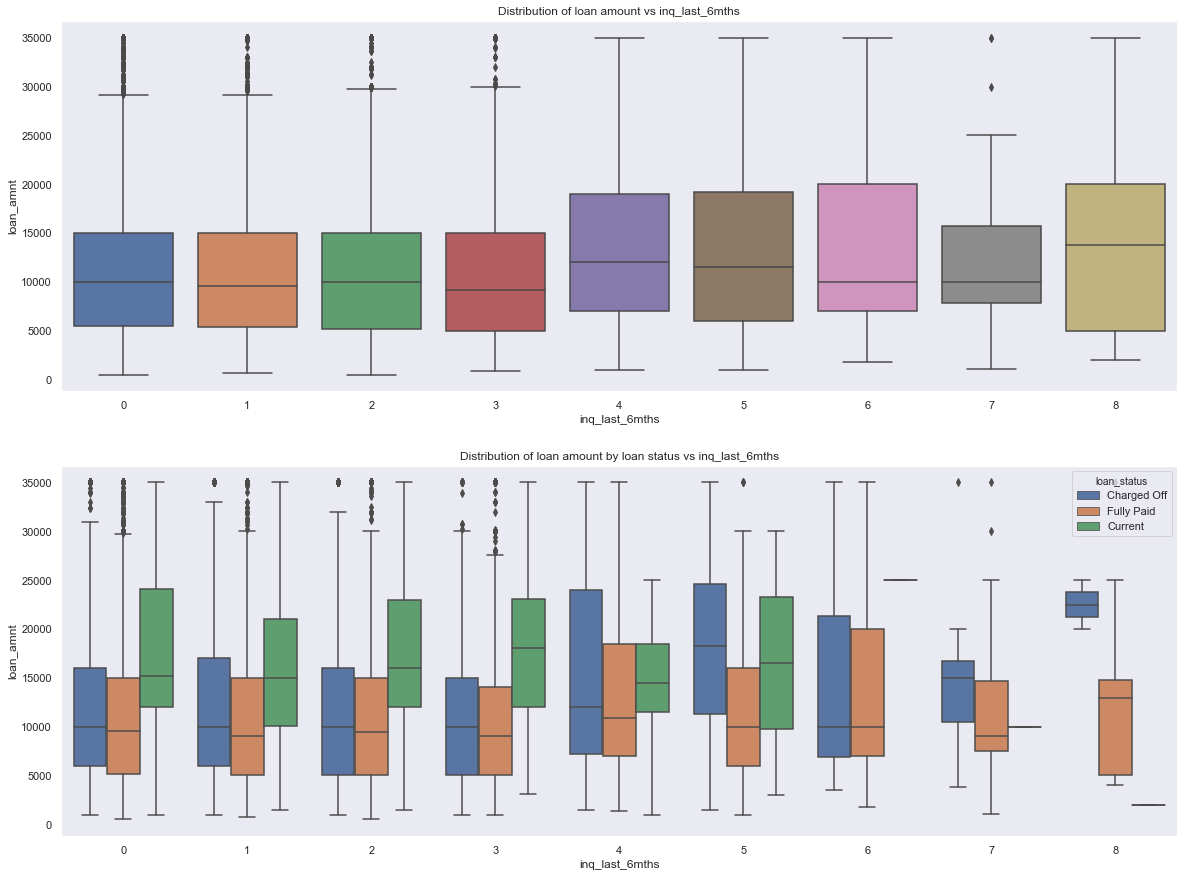

In [389]:
plot_boxplot_vs_loan_amount('inq_last_6mths', figsize=(20,15), nRow=2, nCol=1)

<Figure size 960x480 with 0 Axes>

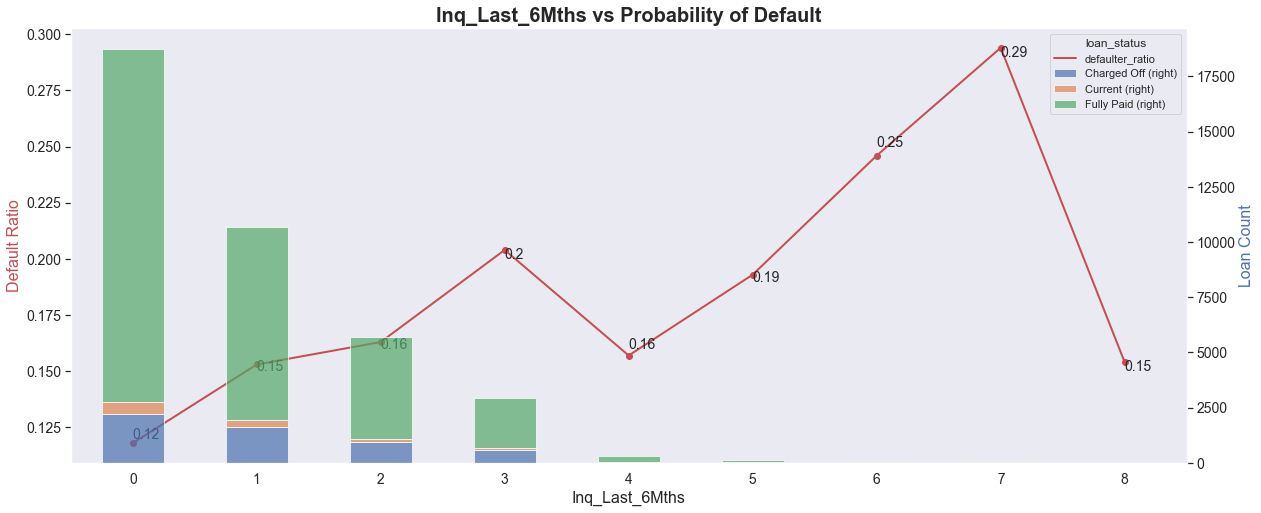

In [390]:
plot_defaulter_percentage(filtered_data, 'inq_last_6mths')

__Analysis summary:__
1. Number of inquiries shows how desperate borrower is. More number of inquiries  means more desperate to take loan.
2. People with more than 5 inquiries have taken loans of large amounts though no of loans are less.
3. People with more than 5 inquiries have greater percentange of charged off loans.

__From above observation, we can say that no. of inquiries is driving factor for chanrged off loans.__

### 6.7 No. of accounts influence default

__First, we will see whether no. of total accounts play any important role on loans__

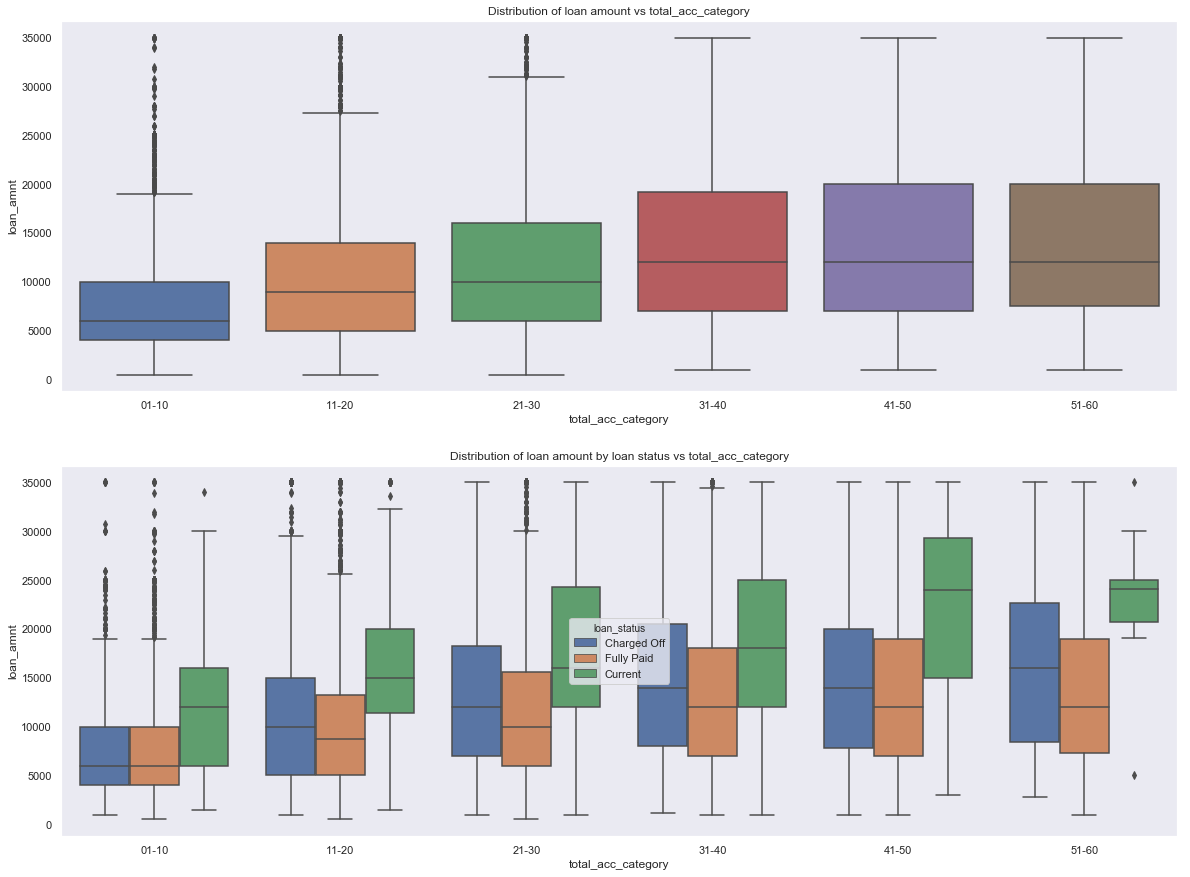

In [391]:
plot_boxplot_vs_loan_amount('total_acc_category', order=get_steps(0,60,10), figsize=(20,15), nRow=2, nCol=1)

<Figure size 960x480 with 0 Axes>

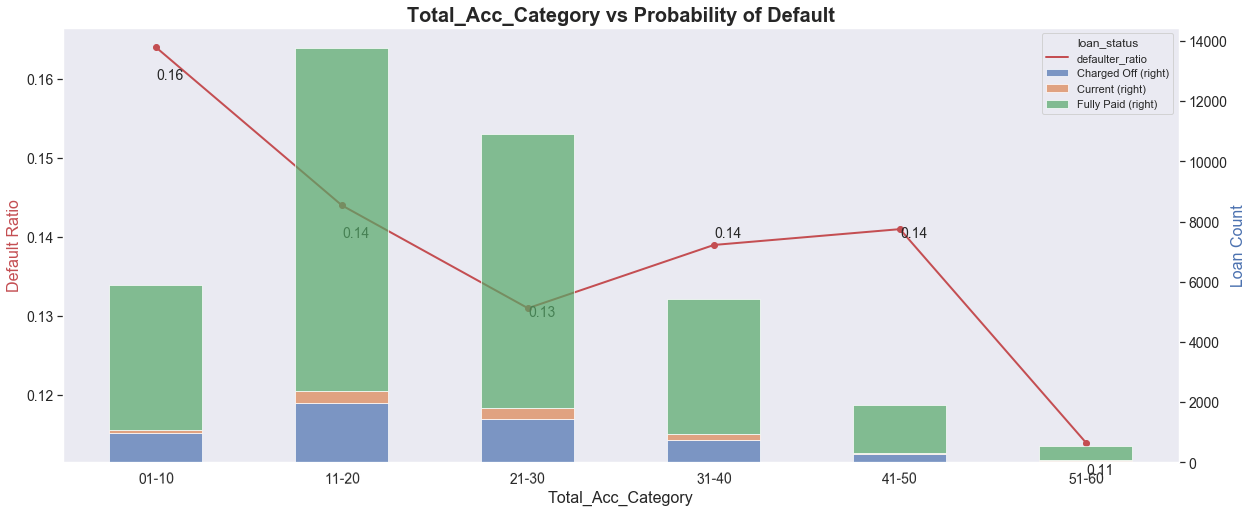

In [392]:
plot_defaulter_percentage(filtered_data, 'total_acc_category')

__Analysis summary:__
1. Loan amount is increasing with no of total credit lines.
2. People with higher credit lines seems to have lower default percentage.
2. People with lower (1-10) total credit lines have the highest percentage of charged off loans.

__Now, lets understand impact of no. of open accounts__

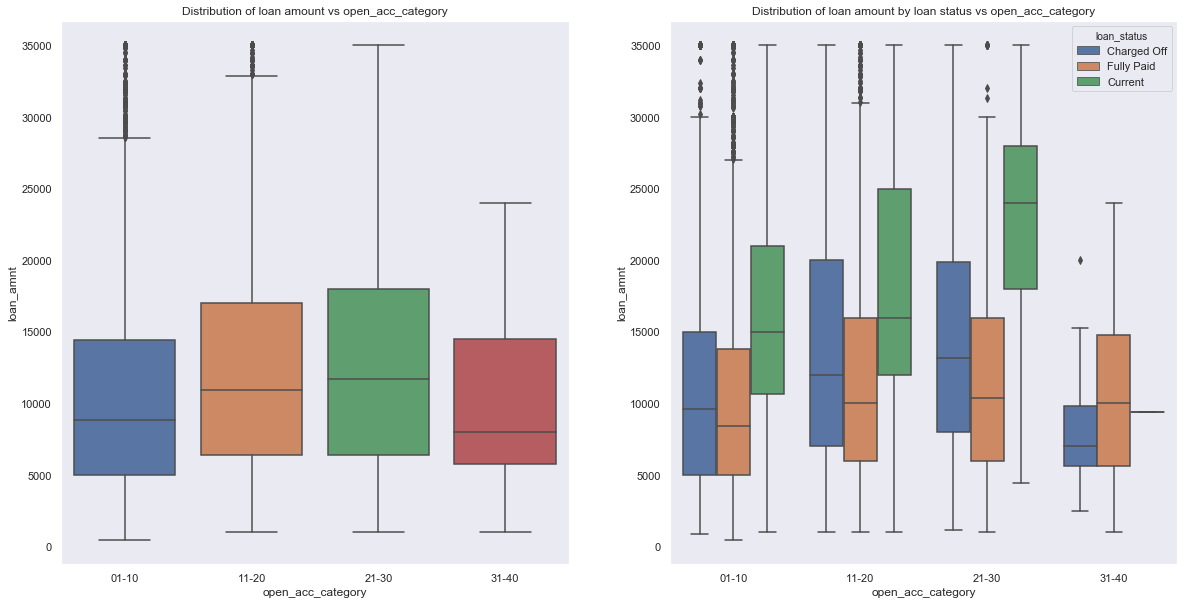

In [393]:
plot_boxplot_vs_loan_amount('open_acc_category', order=get_steps(0,40,10), figsize=(20,10), nRow=1, nCol=2)

<Figure size 960x480 with 0 Axes>

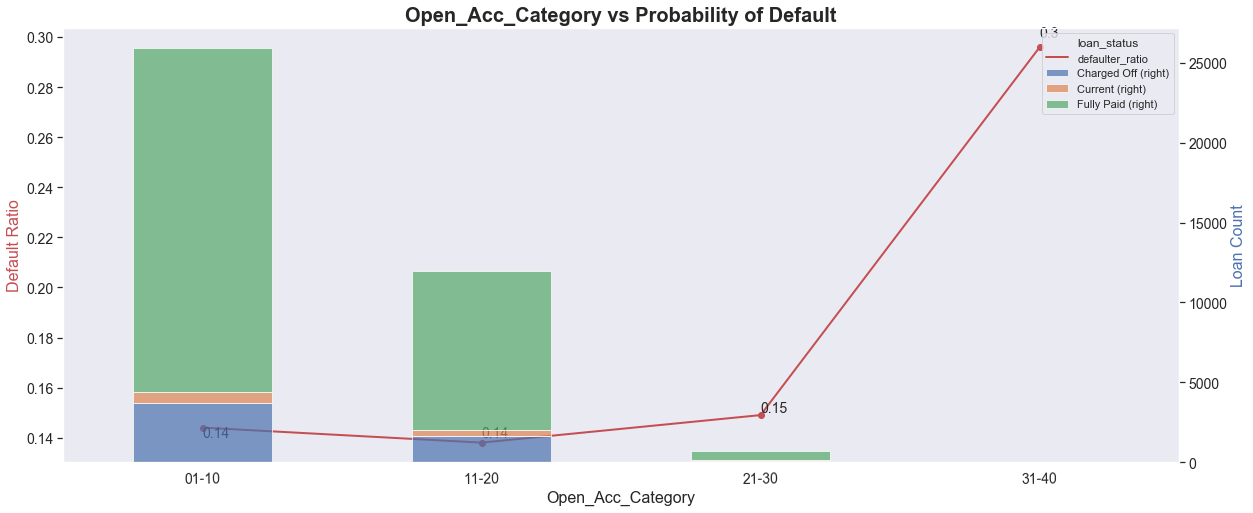

In [394]:
plot_defaulter_percentage(filtered_data, 'open_acc_category')

__Analysis summary:__
1. There is not much difference in loan amount by no. of open accounts.
2. As no. of open accounts are increasing, percentage of charged off loans is also increasing.
3. People with 31-40 open accounts have high % of charged off loans.

### 6.8 Purpose Vs Default

#### Percentage of defaulters in purpose<a id='Purpose'></a>

<Figure size 960x480 with 0 Axes>

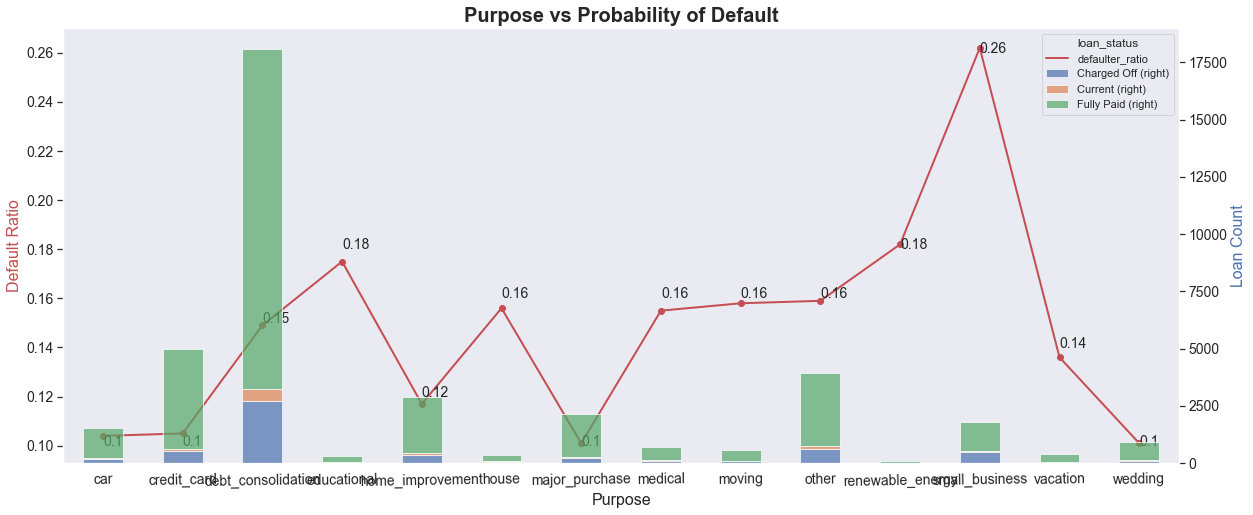

In [395]:
plot_defaulter_percentage(filtered_data,'purpose')

__Default probability is significantly higher in 'small business' loans followed by 'renewable energy'__

#### Distribution of loan amount across purposes</H4>

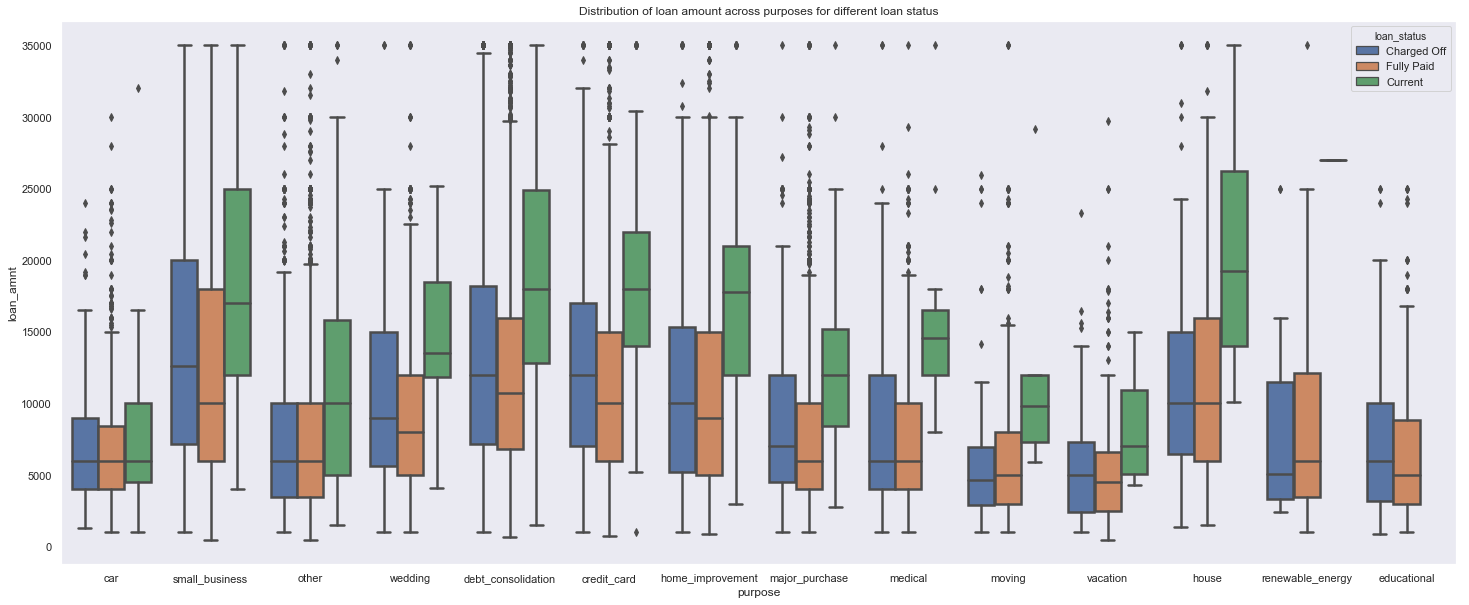

In [396]:
plt.figure(num=None,figsize=(25,10))
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title("Distribution of loan amount across purposes for different loan status")
sns.boxplot(x="purpose", y="loan_amnt",  hue="loan_status",data=filtered_data, linewidth=2.5)
plt.show()

__Observed that greater loan amount are given to defaulter borrowers who give small business and credit cards as purpose in their application . And lesser loan amount are allotted to borrowers having moving and vacation in their loan application purpose__

#### Checking installment/monthly income  ratio effect on purpose in defaulters

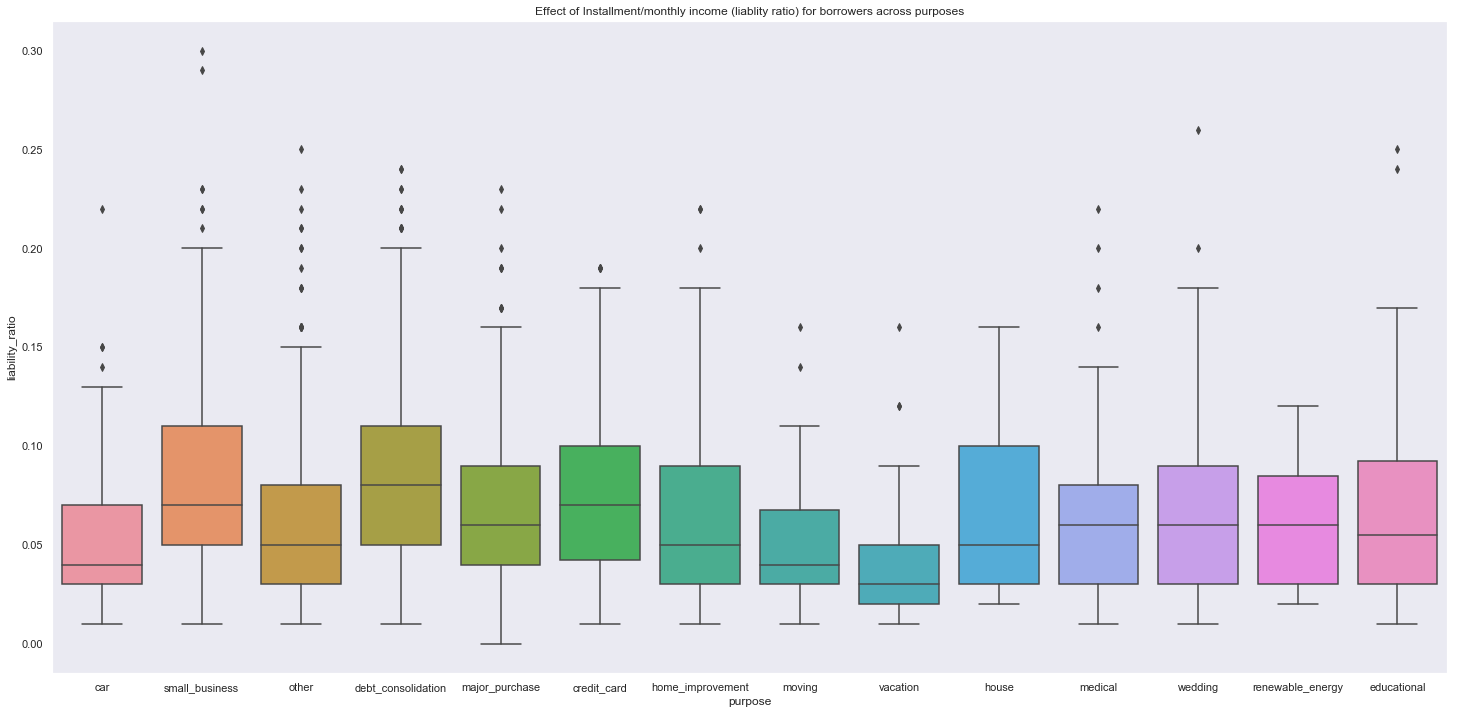

In [397]:
plt.figure(num=None,figsize=(25,12))
plt.title("Effect of Installment/monthly income (liablity ratio) for borrowers across purposes")
sns.boxplot(x='purpose', y='liability_ratio', data=filtered_data.loc[filtered_data['loan_status']=='Charged Off'])

__Applicants who are defaulters have higher liability ratio in small business , debt consolidation and credit card__ 

__Analysis summary:__
1. Higher ratio of defaulters are seen in borrowers who have purpose as small business, debt consolidation and credit card
2. Thus this is definitely a driver variable indicating that borrowers who lend loans for opening startups and small business tend to default more.

### 6.9. Home Ownership Vs Default

#### Effect of home ownership on ending up being defaulter

loan_status     Charged Off  Current  Fully Paid      defaulter_ratio
home_ownership                                                       
RENT                   2783      404       15338                15.02
OWN                     435       78        2455                14.66
MORTGAGE               2269      593       14260                13.25


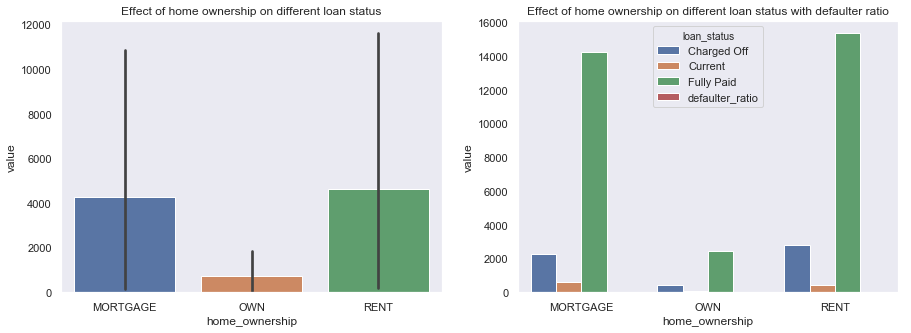

In [398]:
ratio_crosstab(x='home_ownership',title1='Effect of home ownership on different loan status',title2='Effect of home ownership on different loan status with defaulter ratio')

__Home ownership does not play a vital role here it seems , as defaulter ratio is about same. But it is seen that most people have a rented house or have mortgage their house__

#### Percentage of defaulter in home_ownership

<Figure size 960x480 with 0 Axes>

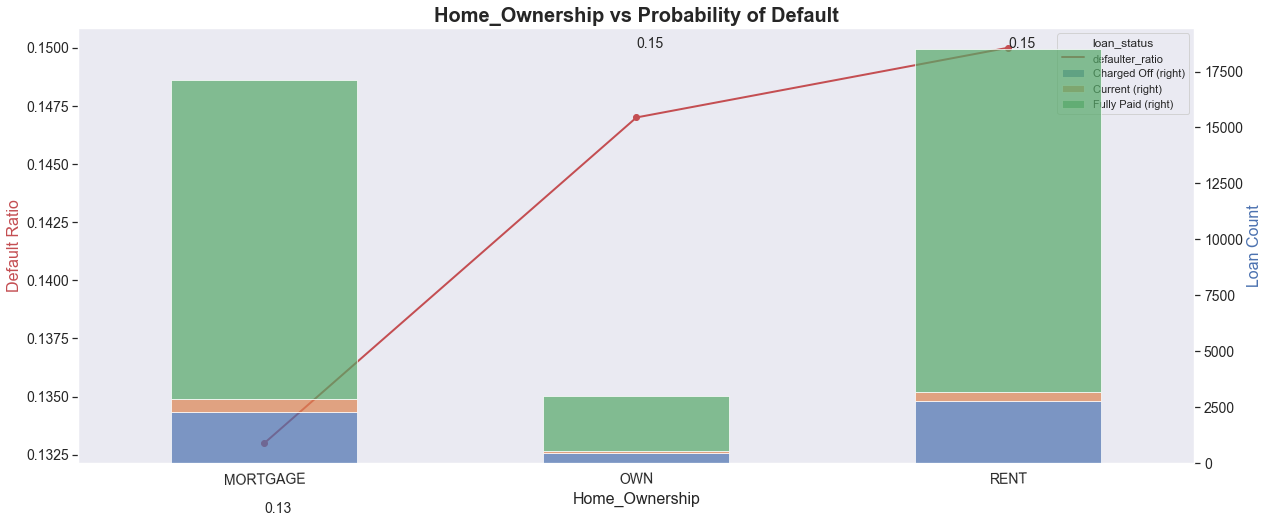

In [399]:
plot_defaulter_percentage(filtered_data,'home_ownership')

__Defaulter ratio is slightly higher in rent than that of own and mortgage,but we have very less loans in other category__

#### Distribution of amount borrowed by Home Ownership</H4>

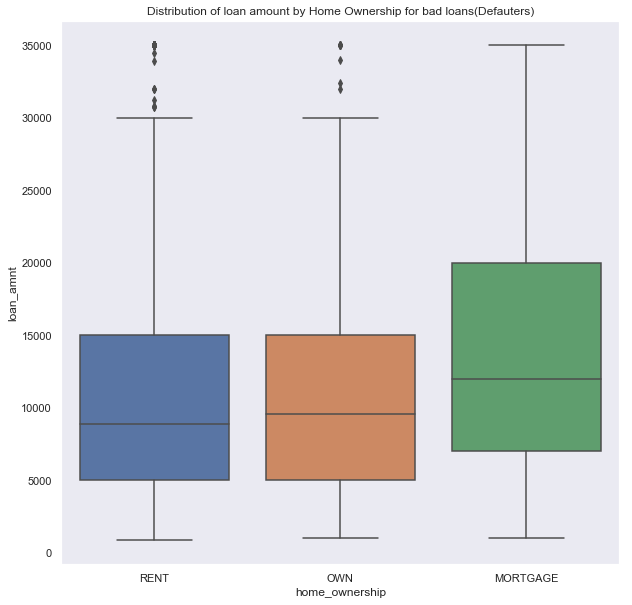

In [400]:
plt.figure(num=None,figsize=(10,10))
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.title("Distribution of loan amount by Home Ownership for bad loans(Defauters)")
sns.boxplot(x="home_ownership", y="loan_amnt", data=filtered_data.loc[filtered_data['loan_status']=='Charged Off'])
plt.show()

__It is seen that borrowerswho are defaulters with home ownership type as 'Mortgage' tend to buy more loans from bank than those who are on rent or own a house__

#### Distribution of amount borrowed through the years

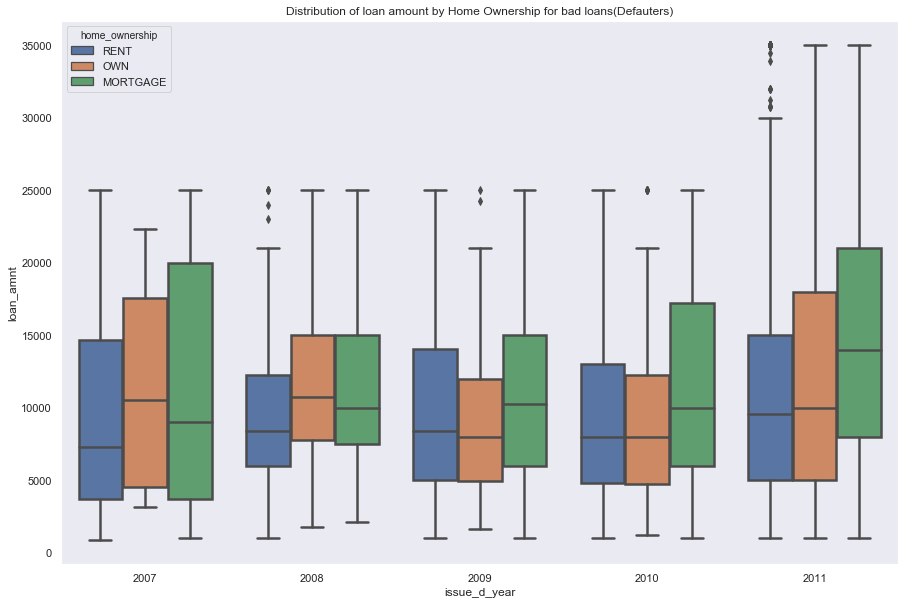

In [401]:
plt.figure(num=None,figsize=(15,10))
plt.xlabel('Home Ownership Through Years')
plt.ylabel('Loan Amount')
plt.title("Distribution of loan amount by Home Ownership for bad loans(Defauters)")
sns.boxplot(x="issue_d_year", y="loan_amnt",  hue="home_ownership",data=filtered_data.loc[filtered_data['loan_status']=='Charged Off'], linewidth=2.5)
plt.show()

__Observed that loan is given more to defaulters who have mortgage their house in years 2007 ,2010 and 2011 . Whereas loan is given more to defaulters who have others in the house_ownership during form filling in years 2008 and 2009__

### 6.10. Verification Status Vs Default

#### Check effect of verification status on funded amt across status

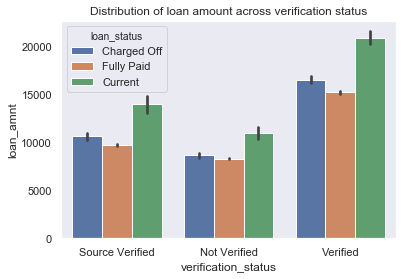

In [402]:
plt.title("Distribution of loan amount across verification status")
sns.barplot(x='verification_status',y='loan_amnt',hue='loan_status',data=filtered_data)
plt.show()

__As seen the verification status does little effect on being a defaulter or not__

#### Checking the trend for each loan status

In [403]:
filtered_data.pivot_table(values='loan_amnt',index='verification_status',columns='loan_status',aggfunc='count')

loan_status          Charged Off  Current  Fully Paid
verification_status                                  
Not Verified                2098      215       14269
Source Verified             1408      301        8054
Verified                    1981      559        9730

__Here verified people are more__

#### Plot percentage of defaulter for different verification_status

<Figure size 960x480 with 0 Axes>

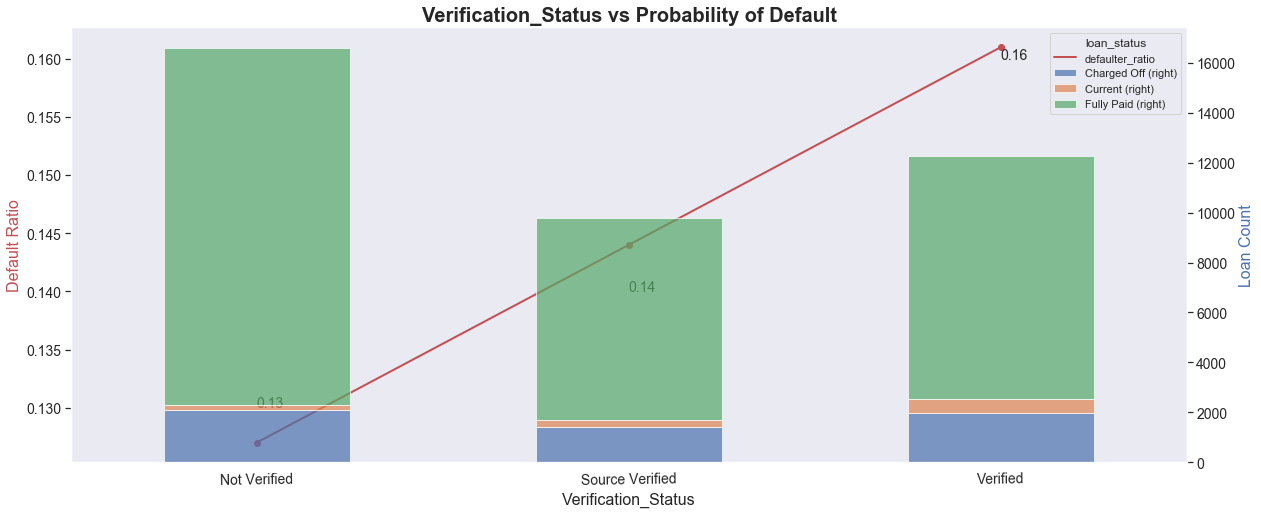

In [404]:
plot_defaulter_percentage(filtered_data,'verification_status')

__Not much difference in percentage of defaulters for different verification types but ratio of defaulters in verfied loans are higher__

### 6.11. Revolving balance & Utilization Vs Default

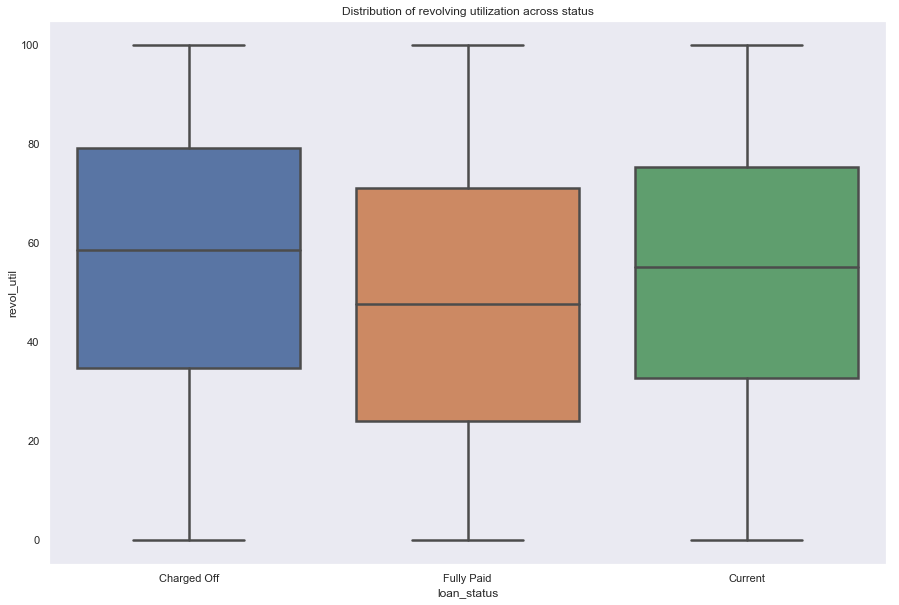

In [405]:
plt.figure(num=None,figsize=(15,10))
plt.xlabel('Loan Status')
plt.ylabel('Revolving Utilzation')
plt.title("Distribution of revolving utilization across status")
sns.boxplot(x="loan_status", y="revol_util",data=filtered_data, linewidth=2.5)
plt.show()

__Revolving utilization rate is slightly higher in borrowers who are defaulters__

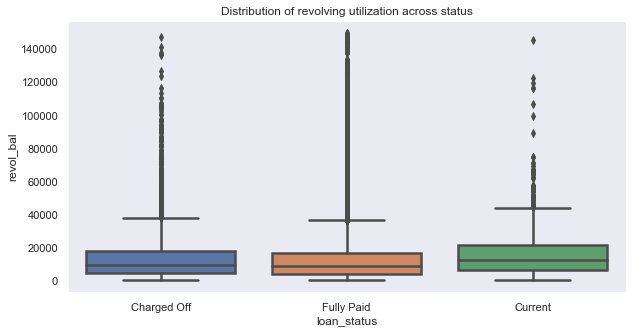

In [406]:
plt.figure(num=None,figsize=(10,5))
plt.xlabel('Loan Status')
plt.ylabel('Revolving Balance')
plt.title("Distribution of revolving utilization across status")
sns.boxplot(x="loan_status", y="revol_bal",data=filtered_data, linewidth=2.5)
plt.show()

### 6.12. Returns Vs Default
Will be performing segmented analysis on Returns made by LC for all of the driver variables found so far.

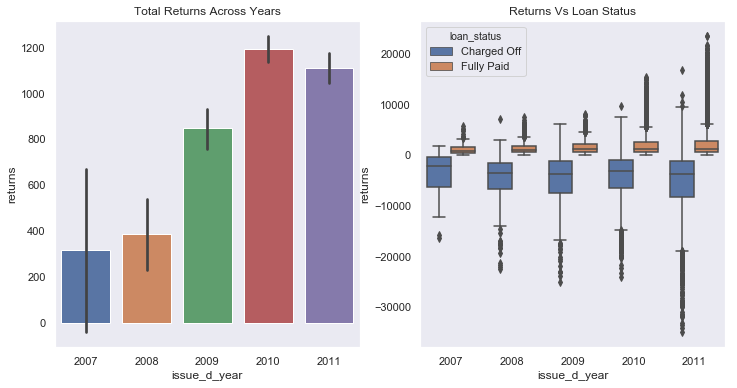

In [407]:
non_current_df = filtered_data[filtered_data.loan_status!='Current']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='issue_d_year', y='returns', data=non_current_df)
plt.title("Total Returns Across Years")
plt.subplot(1, 2, 2)
sns.boxplot(x='issue_d_year', y='returns', hue='loan_status', data=non_current_df)
plt.title("Returns Vs Loan Status")
plt.show()

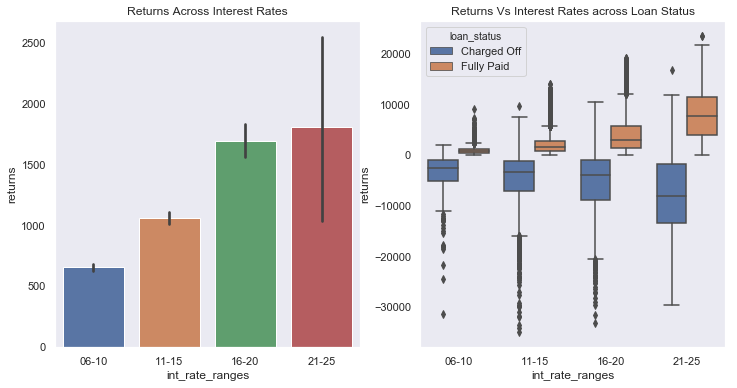

In [408]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='int_rate_ranges', y='returns', data=non_current_df, order=['06-10','11-15','16-20','21-25'])
plt.title("Returns Across Interest Rates")
plt.subplot(1, 2, 2)
sns.boxplot(x='int_rate_ranges', y='returns', hue='loan_status', data=non_current_df, order=['06-10','11-15','16-20','21-25'])
plt.title("Returns Vs Interest Rates across Loan Status")
plt.show()

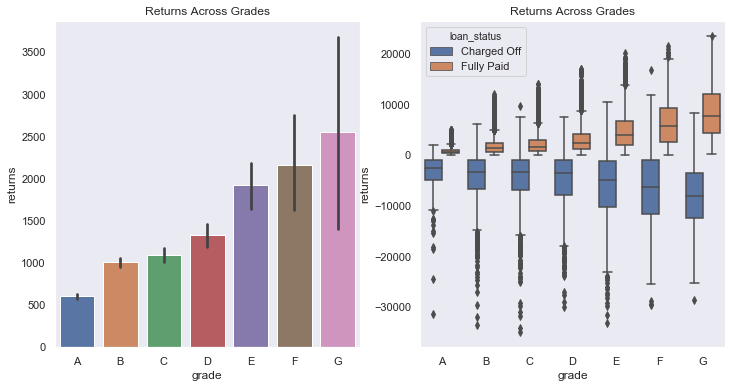

In [409]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='grade', y='returns', data=non_current_df,order=["A", "B","C", "D","E", "F","G"])
plt.title("Returns Across Grades")
plt.subplot(1, 2, 2)
sns.boxplot(x='grade', y='returns', hue='loan_status', data=non_current_df,order=["A", "B","C", "D","E", "F","G"])
plt.title("Returns Across Grades")
plt.show()

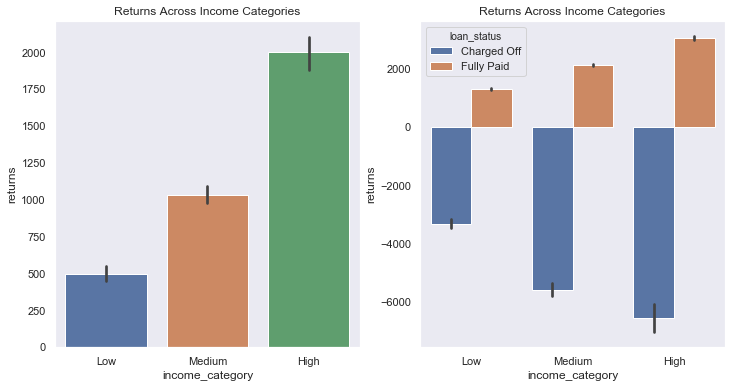

In [410]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='income_category', y='returns', data=non_current_df)
plt.title("Returns Across Income Categories")
plt.subplot(1, 2, 2)
sns.barplot(x='income_category', y='returns', hue='loan_status', data=non_current_df)
plt.title("Returns Across Income Categories")
plt.show()

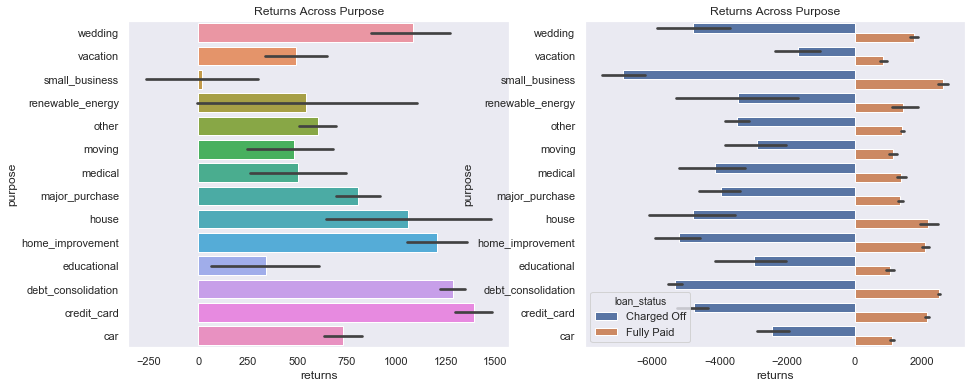

In [411]:
plt.figure(figsize=(15, 6))
# Find the order
my_order = non_current_df.groupby(by=["purpose"])["returns"].sum().iloc[::-1].index
plt.subplot(1, 2, 1)
sns.barplot(y='purpose', x='returns', data=non_current_df,order=my_order)
plt.title("Returns Across Purpose")
plt.subplot(1, 2, 2)
sns.barplot(y='purpose', x='returns', hue='loan_status', data=non_current_df,order=my_order)
plt.title("Returns Across Purpose")
plt.show()

Text(0.5, 1.0, 'Returns Across Years')

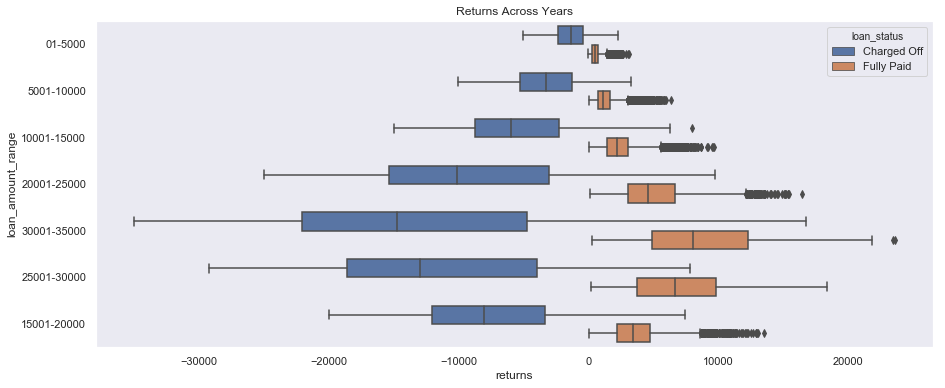

In [412]:
plt.figure(figsize=(15, 6))

sns.boxplot(y='loan_amount_range', x='returns', hue='loan_status', data=non_current_df)
plt.title("Returns Across Years")

#### Summary:
1. This section analysed the returns made by LC across various driver variables
2. Higher interest rates & Lower Grades recorded higher average and volume of loss
3. Purpose wise loss analysis clearly indicates loss generating purposes about which LC needs to be more cautious.
4. Loss seemed proportional to loan amount. Higher loan amount brackets causing higher amount of loss. Will be doing futher analysis below on loan amount being driver variable.

### 6.13. Loan distribution throughout the year for particular loan status

In [413]:
quarter_dist=filtered_data[['issue_d_quarter','loan_status','loan_amnt']].groupby(['issue_d_quarter','loan_status']).agg(['count','sum'])

In [414]:
quarter_dist.reset_index(inplace=True)
quarter_dist.columns=quarter_dist.columns.map('_'.join).str.strip('_')
quarter_dist['avg_dist']=quarter_dist['loan_amnt_sum']/quarter_dist['loan_amnt_count']
        
        

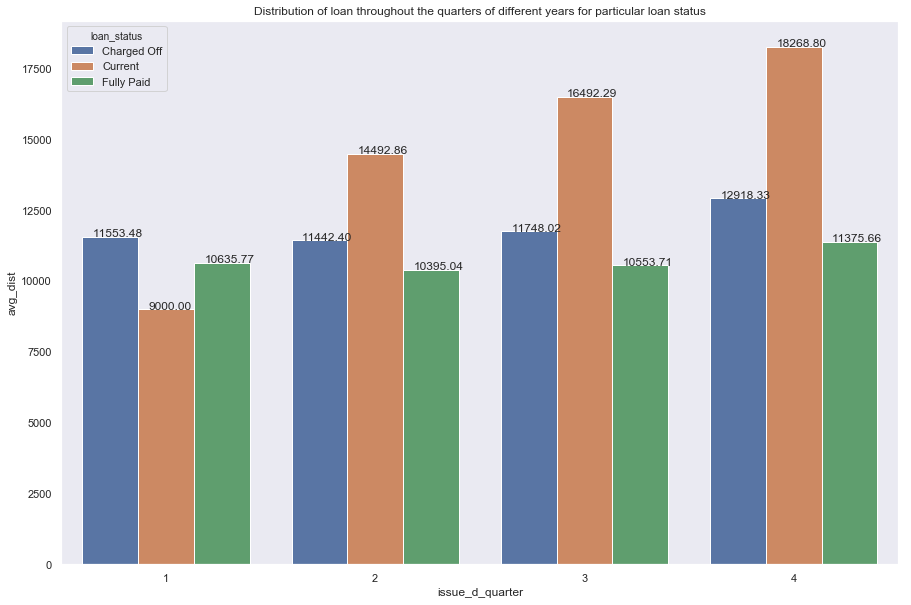

In [415]:
plt.figure(num=None,figsize=(15,10))
x = np.random.normal(size=37)
y = np.random.lognormal(size=37)
ax=sns.barplot(x='issue_d_quarter', y='avg_dist', hue='loan_status', data=quarter_dist)
plt.title("Distribution of loan throughout the quarters of different years for particular loan status")
for p in ax.patches:
        ax.annotate('{:1.2f}'.format((p.get_height())), (p.get_x()+0.05, p.get_height()+.20))  
plt.show()

__Observed that loan amount wise more bad loans have been granted in quarter 4__

<Figure size 960x480 with 0 Axes>

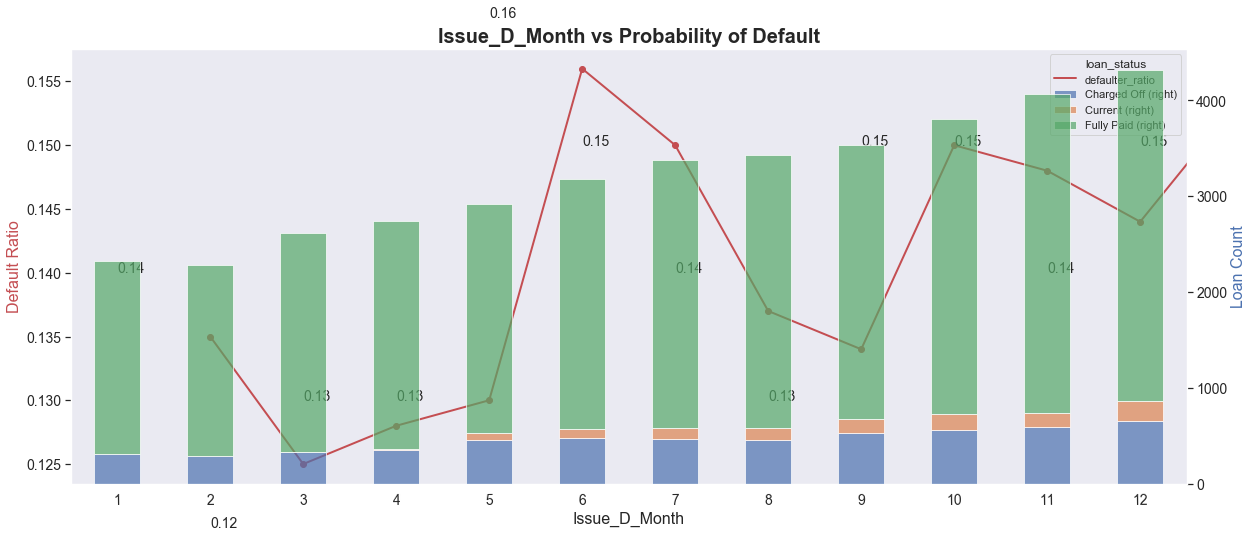

<Figure size 960x480 with 0 Axes>

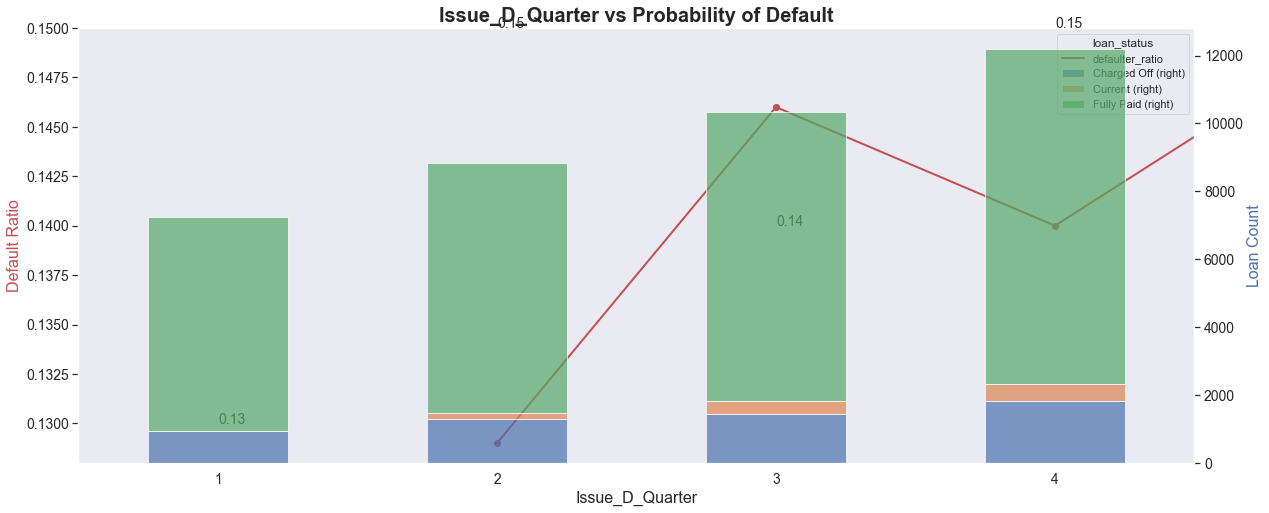

In [416]:
plot_defaulter_percentage(filtered_data,'issue_d_month')
plot_defaulter_percentage(filtered_data,'issue_d_quarter')


##### Analysis Summary:
1. Highest amount of bad loans given in last quarter of every year, with most in the month of December.
2. In terms of default percentage, months of June & October are indicating highest numbers. Unable to conclude if time of issue has any impact on loan being charged off.

### 6.13. Delinquincy Cases

<h4>6.13.1 Checking delinquincy cases against loan status</h4>

<Figure size 960x480 with 0 Axes>

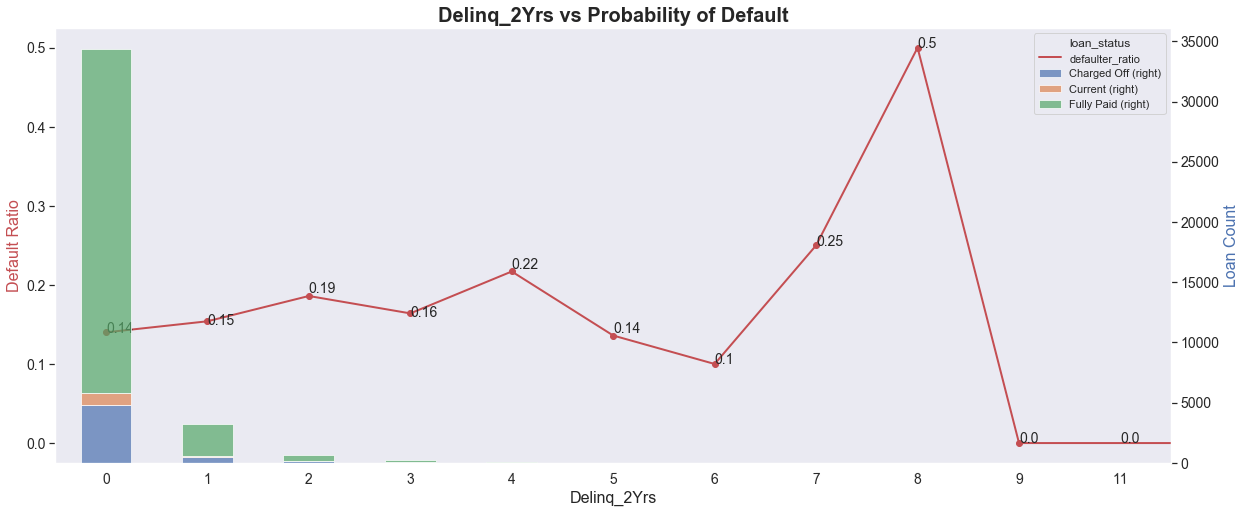

In [417]:
plot_defaulter_percentage(filtered_data,'delinq_2yrs')

__Observed that delinqincy zero cases are maximum__

<H4>6.13.2 Checking non zero cases of delinquincy among loan status</H4>

0.10941344037291208


<Figure size 960x480 with 0 Axes>

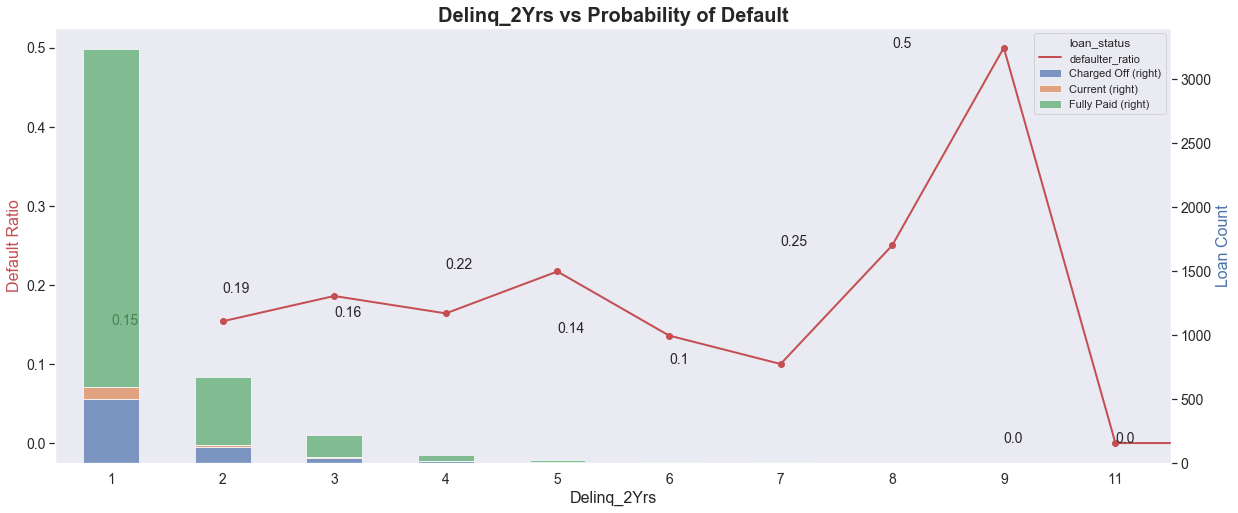

In [418]:
print(len(filtered_data.loc[filtered_data['delinq_2yrs']>0])/len(filtered_data))
plot_defaulter_percentage(filtered_data.loc[filtered_data['delinq_2yrs']>0],'delinq_2yrs')

__Has been observed that most cases (excluding zero) are 1 and seeing the current graph does not denote a direct relation with defaulters as fully paid are more in that case. Thus this variable is insignificant in analysis__

### 6.14 Loan Amount Vs Default<a id='LoanAmount'></a>

<Figure size 960x480 with 0 Axes>

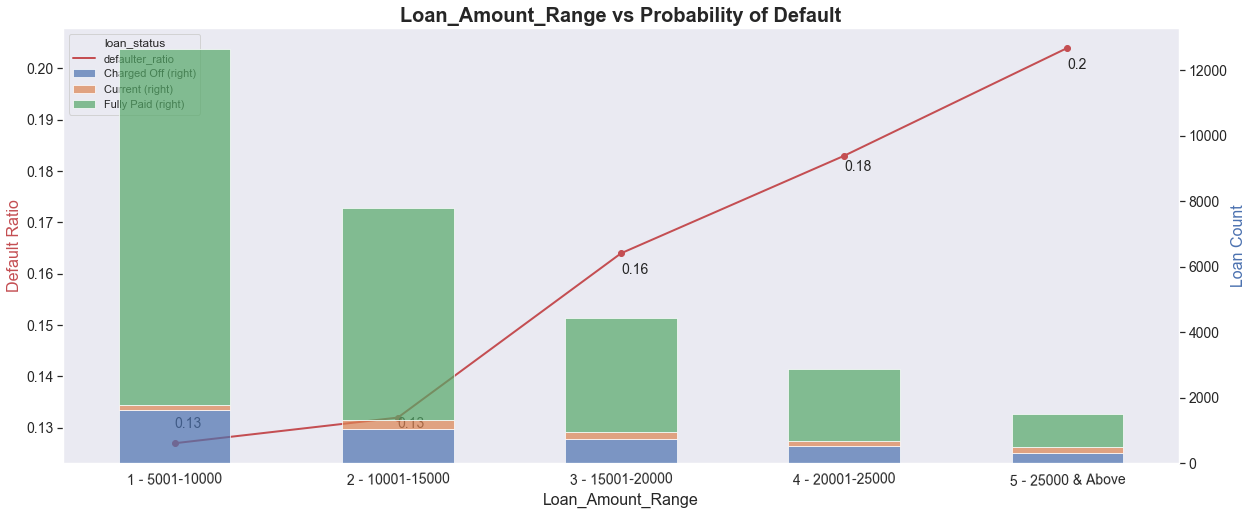

In [419]:
filtered_data['loan_amount_range'] = filtered_data['loan_amnt'].apply(lambda x: get_category(x,0,35000,5000))
def append_order(x):
    if x == '0-5000':
        return  "1 - " + x
    if x == '5001-10000':
        return "1 - " + x
    if x == '10001-15000':
        return "2 - " + x
    if x == '15001-20000':
        return "3 - " + x
    if x == '20001-25000':
        return "4 - " + x
    if x == '25001-30000':
        return "5 - 25000 & Above"
    if x == '30001-35000':
        return "5 - 25000 & Above"
filtered_data['loan_amount_range'] = filtered_data['loan_amount_range'].apply(append_order)
plot_defaulter_percentage(filtered_data,'loan_amount_range')

As the loan amount is increasing, the probability of default is steadily increasing.
Hence loan amount is a driver variable to indicate default.

### 6.14 Credit Age Vs Default

<Figure size 960x480 with 0 Axes>

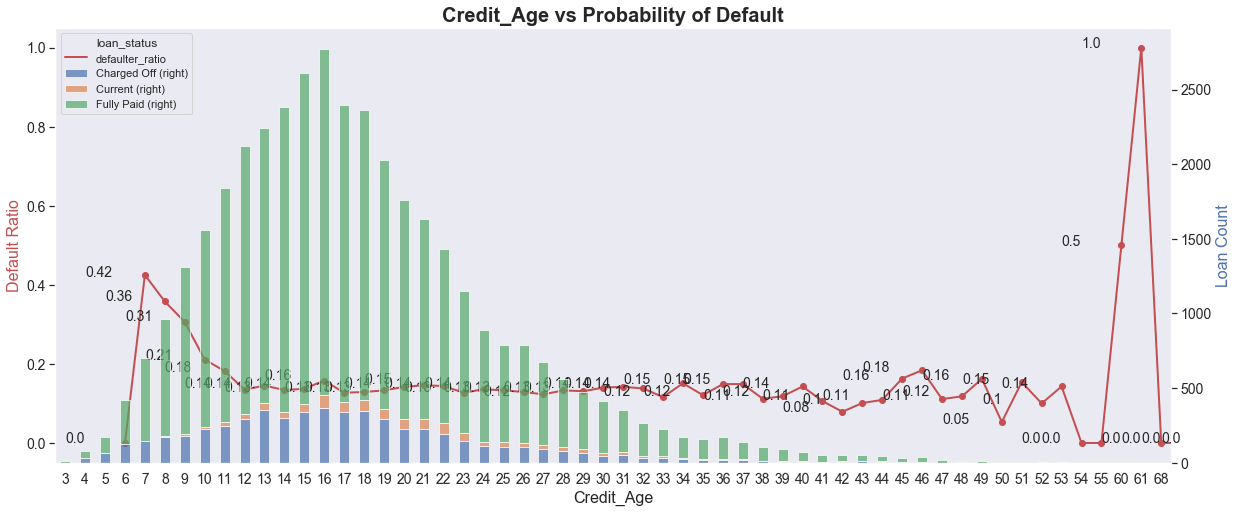

In [420]:
plot_defaulter_percentage(filtered_data,'credit_age')

Credit age betweeb 6-9 years is showing compartively higher probability of fault. But with credit age >= 10, not showing a good correlation with default ratio. So excluding it from further analysis for driver variables.

***

### 6.14. Analysis Conclusion

#### Listing Driver Variables

 - From [Annual Income](#Annual_Income) section , annual_inc can be understood as a driver variable.

- From [Term](#Term) section , term can be understood as a driver variable.

- From [Grade](#Grade) section , grade can be understood as a driver variable.

- From [Number of Inquiries](#no_of_inq) section , no. of inquiries can be understood as a driver variable.

- From [Purpose](#Purpose) section , purpose can be understood as a driver variable.

- From [Loan Amount](#LoanAmount) section , loan_amnt can be understood as a driver variable.

- From [Interest Rate](#InterestRate) section , int_rate can be understood as a driver variable.

- From [DTI](#DTI) section , int_rate can be understood as a driver variable.